In [33]:
import os
import nltk
import pandas as pd
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /home/monty/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/monty/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/monty/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/monty/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [34]:
from paragraph_cleaner import ParagraphCleaner
from paragraph_analysis import ParagraphAnalysis
from utils import big_data_dict, styled_print, create_dir, extract_images, extract_paragraphs, \
    random_select_dict


In [35]:
%load_ext autoreload
%autoreload 2

In [36]:
book_file_path = "../data/raw-data/fire-and-blood.docx"

## Extract Raw Data From the Docx File

Using Microsoft Word's Word Counter Tool, we found the following information:

| Property      | Count |
| ----------- | ----------- |
| Pages       | 703         |
| Words       | 256,032     |
| Paragraphs  | 3197        |
| Lines       | 23,849      |
| Graphics    | 71          |
| Characters (No Space) | 1,189,352 |
| Characters (With Space) | 1,441,453 |

We have used Microsoft Word's Advance Search Feature (Use flag `^g`) to find total number of graphical objects in our document.

The goal of this part of code is to extract similar amount of data from our document. 

**Note** Our numbers might not exactly match these statics but we will try to capture numbers as close to these stats. 

### Extract Images

In [37]:
image_dir = create_dir("../data/processed-data", "book-images")
image_file_paths = extract_images(book_file_path, image_dir, verbose=0)
styled_print(f"Found Total {len(image_file_paths)} Images from the Book {book_file_path}", header=True)

› creating directory ... ../data/processed-data/book-images
› Extracting Images from ../data/raw-data/fire-and-blood.docx
› Found Total 112 Images from the Book ../data/raw-data/fire-and-blood.docx


In [40]:
for i, file_path in enumerate(image_file_paths):
    big_data_dict["book-images"].append(
        {
            "id": i,
            "file": file_path
        }
    )

**Observations**
- As indicated here, we were able to find total 112 images from the book. 
- We have manually checked all the images to verify that there is no `Non-Image` object present. 
- We have found that our approach to extract images actually `extracted all the correct images` and it is much better that using Microsoft Word's Advance Search option to find images. 

### Extract Paragraphs

In [41]:
book_text_dir = create_dir("../data/processed-data", "clean-csvs")
row_paragraphs = extract_paragraphs(book_file_path, min_char_count=1)
styled_print(f"Found Total {len(row_paragraphs)} Paragraphs from the Book {book_file_path}", header=True)

› creating directory ... ../data/processed-data/clean-csvs
› Extracting Paragraphs from ../data/raw-data/fire-and-blood.docx
› Found Total 3168 Paragraphs from the Book ../data/raw-data/fire-and-blood.docx


In [42]:
# Clean Initial Pages and Indexes
for i in range(100):
    row_paragraphs.pop(i, None)

In [43]:
book_df = pd.DataFrame(row_paragraphs.items(), columns=["id", "paragraphs"])
book_df.to_csv(os.path.join(book_text_dir, "book-raw-paragraphs.csv"), index=False, header=True)

In [44]:
styled_print(f"Some Sample Paragraphs from the Book {book_file_path}", header=True)
sampled_paragraphs = random_select_dict(row_paragraphs, 5)
for key, val in sampled_paragraphs.items():
    styled_print(f"{key} - {val}")

› Some Sample Paragraphs from the Book ../data/raw-data/fire-and-blood.docx
    › 1752 - “I will never know how we survived that night, but we did. The next morning the sea was calm again, the sun was shining, and the water was so blue and innocent a man might never know that under it my brother floated, dead with all his men. Lady Meredith was in sad shape, sails torn, masts splintered, nine men amongst the missing. We said prayers for the lost and set about making what repairs we could… and that afternoon, our crow’s eye saw sails in the distance. It was Sun Chaser, come back to find us.”
    › 2124 - loved a child more, Grand Maester Benifer once told her, before the Shivers carried him away. In the last days of her life, Queen Alysanne reflected on his words. “He was wrong, I think,” she wrote, “for surely the Mother Above loved my children more. She took so many of them away from me.”
    › 2695 - Dragonstone that Princess Rhaenys had fallen, angry words were exchanged between the

### Clean Paragraphs

In [45]:
paragraph_cleaner = ParagraphCleaner(row_paragraphs)

In [46]:
cleaned_paragraphs = paragraph_cleaner.clean_paragraphs()
styled_print(f"Found Total {len(cleaned_paragraphs)} Paragraphs from the Book {book_file_path}", header=True)

› Found Total 3129 Paragraphs from the Book ../data/raw-data/fire-and-blood.docx


In [47]:
book_df = pd.DataFrame(cleaned_paragraphs.items(), columns=["id", "paragraphs"])
book_df.to_csv(os.path.join(book_text_dir, "book-clean-paragraphs.csv"), index=False, header=True)

In [48]:
styled_print(f"Some Sample Cleaned Paragraphs from the Book {book_file_path}", header=True)
sampled_paragraphs = random_select_dict(cleaned_paragraphs, 5)
for key, val in sampled_paragraphs.items():
    styled_print(f"{key} - {val}")

› Some Sample Cleaned Paragraphs from the Book ../data/raw-data/fire-and-blood.docx
    › 952 - two sisters and a mother  the three queens were bound by blood and grief and suffering…and yet between them lay shadows old and new  growing darker by the day. the amity and unity of purpose that had enabled jaehaerys  his sisters  and their mother to topple maegor the cruel had begun to fray  as long simmering resentments and divisions made themselves felt. for the remainder of the regency the boy king and his little queen would find themselves deeply at odds with the king’s hand and the queen regent  in a rivalry that would continue into jaehaerys’s own reign and threaten to plunge the seven kingdoms back into war. 1
    › 1044 - westeros.” lyman lannister  lord of casterly rock  had sheltered her before  she reminded him. queen rhaena was confidant that he would welcome her again.
    › 3291 - and there aegon might have remained  hidden yet harmless  dulling his pain with wine and hiding 

Extract the enitities from each paragraph

In [50]:
from spacy_triple_extraction import spacy_NER, sort_entities
from tqdm import tqdm
entities_list = []
c = 0
for x in tqdm(cleaned_paragraphs):
    c+=1
    if c > 1000:
        break
    entities = spacy_NER(cleaned_paragraphs[x], "PERSON")
    for entity in entities:
        entities_list.append([entity.replace("’", ""),entities[entity]])

 32%|███▏      | 1000/3129 [00:16<00:35, 59.97it/s]


In [51]:
entities_list

[['aegon targaryens', 'PERSON'],
 ['aegon', 'PERSON'],
 ['gaemon targaryen  brother', 'PERSON'],
 ['gaemon', 'PERSON'],
 ['aegon', 'PERSON'],
 ['aegon', 'PERSON'],
 ['king argilac  last', 'PERSON'],
 ['harwyn hardhand', 'PERSON'],
 ['harren', 'PERSON'],
 ['aegon targaryen', 'PERSON'],
 ['mooton', 'PERSON'],
 ['visenya targaryen', 'PERSON'],
 ['aegon', 'PERSON'],
 ['visenya stern  serious', 'PERSON'],
 ['aegon', 'PERSON'],
 ['triston massey  lord', 'PERSON'],
 ['errol  fell', 'PERSON'],
 ['errol  fell', 'PERSON'],
 ['harren', 'PERSON'],
 ['grey', 'PERSON'],
 ['aegon', 'PERSON'],
 ['thrice argilac', 'PERSON'],
 ['aegon targaryen', 'PERSON'],
 ['sharra arryn', 'PERSON'],
 ['aegon targaryen', 'PERSON'],
 ['jon mooton', 'PERSON'],
 ['mooton', 'PERSON'],
 ['visenya', 'PERSON'],
 ['lord loren', 'PERSON'],
 ['aegon', 'PERSON'],
 ['aegon', 'PERSON'],
 ['brandon snow', 'PERSON'],
 ['brandon snow', 'PERSON'],
 ['sharra arryn', 'PERSON'],
 ['rhaenys targaryen', 'PERSON'],
 ['meria martell', 'PERSO

### Character information extraction

In [52]:
import Levenshtein
characters = set([x[0] for x in entities_list if x[1]=="PERSON"])
def remove_duplicates(character_pairs):
    for pair in character_pairs:
        dists[pair] = (Levenshtein.ratio(pair[1], pair[0]))
        if dists[pair] > 0.7:
            print(pair)
            characters.remove(longest_str(pair))
            print(pair)
character_attributes = {}

Define some suffixes and fill them

In [53]:
royalty = {"king":[], "queen":[], "prince":[], "lord":[], "princess":[], "sir":[], "knight":[], "champion":[]}
houses = {"Stark":[], "Targaryen":[], "Lannister":[], "Greyjoy":[], "Tyrell":[], "Baratheon":[], "Martell":[], "Arryn":[]}

In [72]:
from collections import defaultdict

def find_houses(entities, houses):
    for x in entities:
        for suff in houses:
            if suff.lower() in x.lower():
                houses[suff].append(x)
def find_royalty(entities, royalty):
    for x in entities:
        for pref in royalty:
            if pref == x[0].split()[0]:
                royalty[pref].append(x)
    return royalty


In [73]:
print(find_royalty(entities_list,royalty))
print(houses)

{'king': [['king argilac  last', 'PERSON'], ['king maegor', 'PERSON'], ['king aenys', 'PERSON'], ['king maegor', 'PERSON'], ['king maegor', 'PERSON'], ['king argilac  last', 'PERSON'], ['king maegor', 'PERSON'], ['king aenys', 'PERSON'], ['king maegor', 'PERSON'], ['king maegor', 'PERSON'], ['king argilac  last', 'PERSON'], ['king maegor', 'PERSON'], ['king aenys', 'PERSON'], ['king maegor', 'PERSON'], ['king maegor', 'PERSON'], ['king argilac  last', 'PERSON'], ['king maegor', 'PERSON'], ['king aenys', 'PERSON'], ['king maegor', 'PERSON'], ['king maegor', 'PERSON'], ['king argilac  last', 'PERSON'], ['king maegor', 'PERSON'], ['king aenys', 'PERSON'], ['king maegor', 'PERSON'], ['king maegor', 'PERSON'], ['king argilac  last', 'PERSON'], ['king maegor', 'PERSON'], ['king aenys', 'PERSON'], ['king maegor', 'PERSON'], ['king maegor', 'PERSON']], 'queen': [], 'prince': [['prince aenys', 'PERSON'], ['prince aenys', 'PERSON'], ['prince maegor', 'PERSON'], ['prince aenys', 'PERSON'], ['prin

Get each character pair

In [57]:
character_pairs

{('septon barth concluded', 'harren'),
 ('lord loren', 'triston massey  lord'),
 ('alyssa', 'aethan velaryon  '),
 ('jocelyn', 'wat himself'),
 ('septa karolyn  ', 'visenya targaryen appeared'),
 ('walton stark', 'larissa velaryon  '),
 ('battle', 'jocasta  suggested'),
 ('alyn stokeworth', 'rhaenys'),
 ('albin massey  ', 'archmaester crey'),
 ('grey', 'visenya  '),
 ('mooton', 'lord jon'),
 ('visenya targaryen', 'visenya  '),
 ('big jon hogg', 'jocasta  suggested'),
 ('dick bean', 'jon hogg'),
 ('jocelyn', 'aethan velaryon  king'),
 ('septon oswyck', 'visenya targaryen appeared'),
 ('septon barth concluded', 'alyssa chosen'),
 ('jon piper', 'robin darklyn  called'),
 ('lord jon', 'vhagar'),
 ('robert  ', 'archmaester goodwyn'),
 ('ceryse', 'lord goren'),
 ('hellholt', 'maladon moore'),
 ('alyssa chosen', 'harry  ser'),
 ('walter', 'visenya soon'),
 ('jon cafferen  heir', 'house costayne.'),
 ('aegon targaryen', 'sharra arryn'),
 ('aegon targaryen', 'septon mattheus  lord'),
 ('king ar

In [ ]:
sorted_character_dists = sorted(dists.items(), key=lambda x:x[1], reverse=True)

: 

For each combination of the list of characters, find the sentences where they're both mentioned

In [31]:

sentences = []
for paragraph in tqdm(cleaned_paragraphs):
    sentence_list = cleaned_paragraphs[paragraph].split(".")
    for sentence in sentence_list:
        sentences.append(sentence)
sentences_annotated = {}
for sentence in tqdm(sentences):
    for pair in character_pairs:
        if pair[1] in sentence and pair[0] in sentence:
            sentences_annotated[sentence] = pair

NameError: name 'cleaned_paragraphs' is not defined

In [112]:
for l in sentences_annotated:
    for entity in sentences_annotated[l]:
        character_attributes[entity] = []

In [118]:
sentences_annotated

{'he maesters of the citadel who keep the histories of westeros have used aegon’s conquest as their touchstone for the past three hundred years': ('maester',
  'aegon'),
 ' aegon targaryen’s conquest of the seven kingdoms did not take place in a single day': ('aegon',
  'aegon targaryen'),
 ' more than two years passed between aegon’s landing and his oldtown coronation…and even then the conquest remained incomplete  since dorne remained unsubdued': ('aegon',
  'oldtown'),
 ' the day of aegon’s landing was celebrated by the king and his descendants  but the conqueror actually dated the start of his reign from the day he was crowned and anointed in the starry sept of oldtown by the high septon of the faith': ('septon',
  'oldtown'),
 ' gaemon targaryen  brother and husband to daenys the dreamer  followed aenar the exile as lord of dragonstone  and became known as gaemon the glorious': ('gaemon targaryen  brother',
  'gaemon'),
 ' gaemon’s son aegon and his daughter elaena ruled together 

For each sentence, determine the subject, and the sentiment...we can associate this sentiment(or an average of all of the respective sentiments to the subject's attribute)

In [89]:
from sentiment_analysis import sentiment_analysis
import spacy
import en_core_web_sm
nlp = spacy.load('en_core_web_sm')
for sentence in tqdm(sentences_annotated):
    nlp_doc = nlp(sentence)
    subject = [tok.text for tok in nlp_doc if (tok.dep_ == "nsubj")]
    for potential_entity in subject:
        if str(potential_entity)==sentences_annotated[sentence][0]:
            character_attributes[potential_entity].append(sentiment_analysis(sentence))
        elif str(potential_entity)==sentences_annotated[sentence][0]:
            character_attributes[potential_entity].append(sentiment_analysis(sentence))

NameError: name 'sentences_annotated' is not defined

In [ ]:
for character in character_attributes:
    if len(character_attributes[character]) > 0:
        character_attributes[character] = sum(character_attributes[character])/len(character_attributes[character])

In [88]:
character_attributes

{}

### Analysis of Raw Paragraphs

In [ ]:
out_dir = create_dir("../data", "analysis-data")
paragraph_analysis = ParagraphAnalysis(
    row_paragraphs, 
    out_dir=out_dir
)
styled_print(f"Found {paragraph_analysis.words_counts} Words.", header=True)

› creating directory ... ../data/analysis-data
› Found 299336 Words.


#### Histogram of Paragraph Lengths

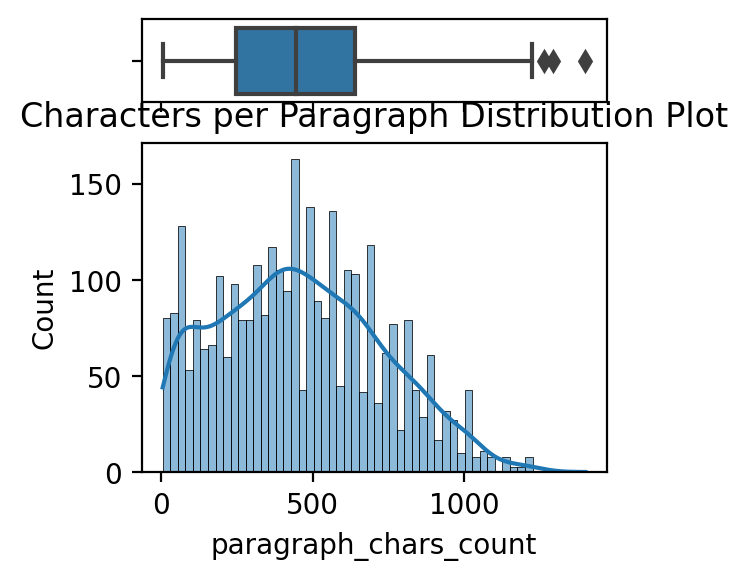

In [ ]:
paragraph_analysis.characters_per_paragraph_histogram(
    figsize=(3, 3), dpi=200, save_flag=False
)

#### Histogram of Words per Paragraph

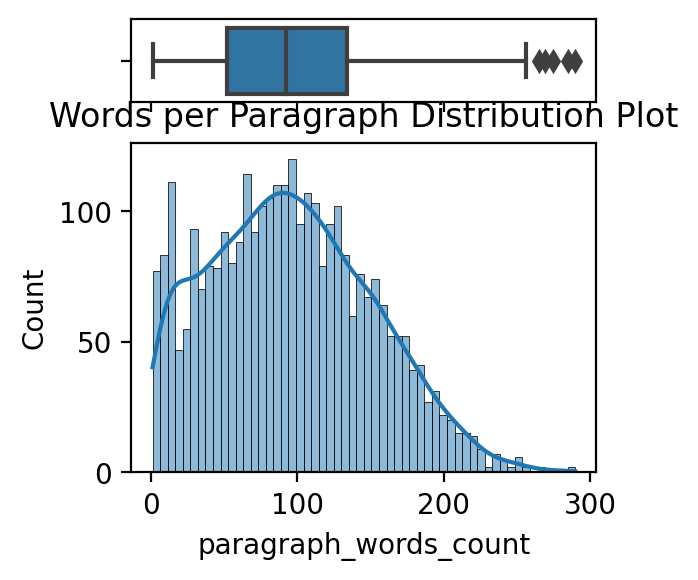

In [ ]:
paragraph_analysis.words_per_paragraph_histogram(
    figsize=(3, 3), dpi=200, save_flag=False
)

#### Histogram of Avg Word Length per Paragraph

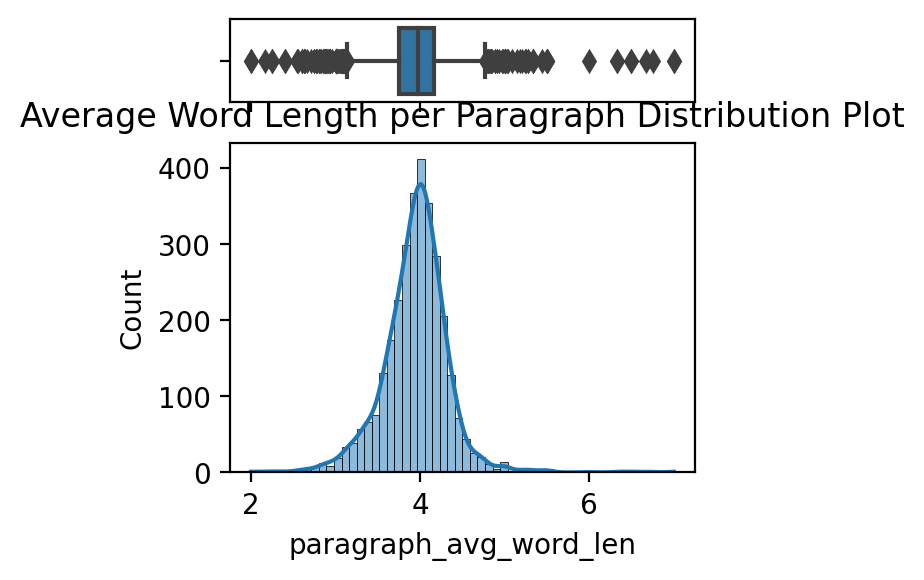

In [ ]:
paragraph_analysis.avg_word_len_per_paragraph_histogram(
    figsize=(3, 3), dpi=200, save_flag=False
)

#### Checking Stop Words

In [ ]:
stop_words_corpus = paragraph_analysis.get_stop_words_corpus(language='english')
styled_print(f"Found {len(stop_words_corpus.keys())} unique stop words", header=True)

› Found 138 unique stop words


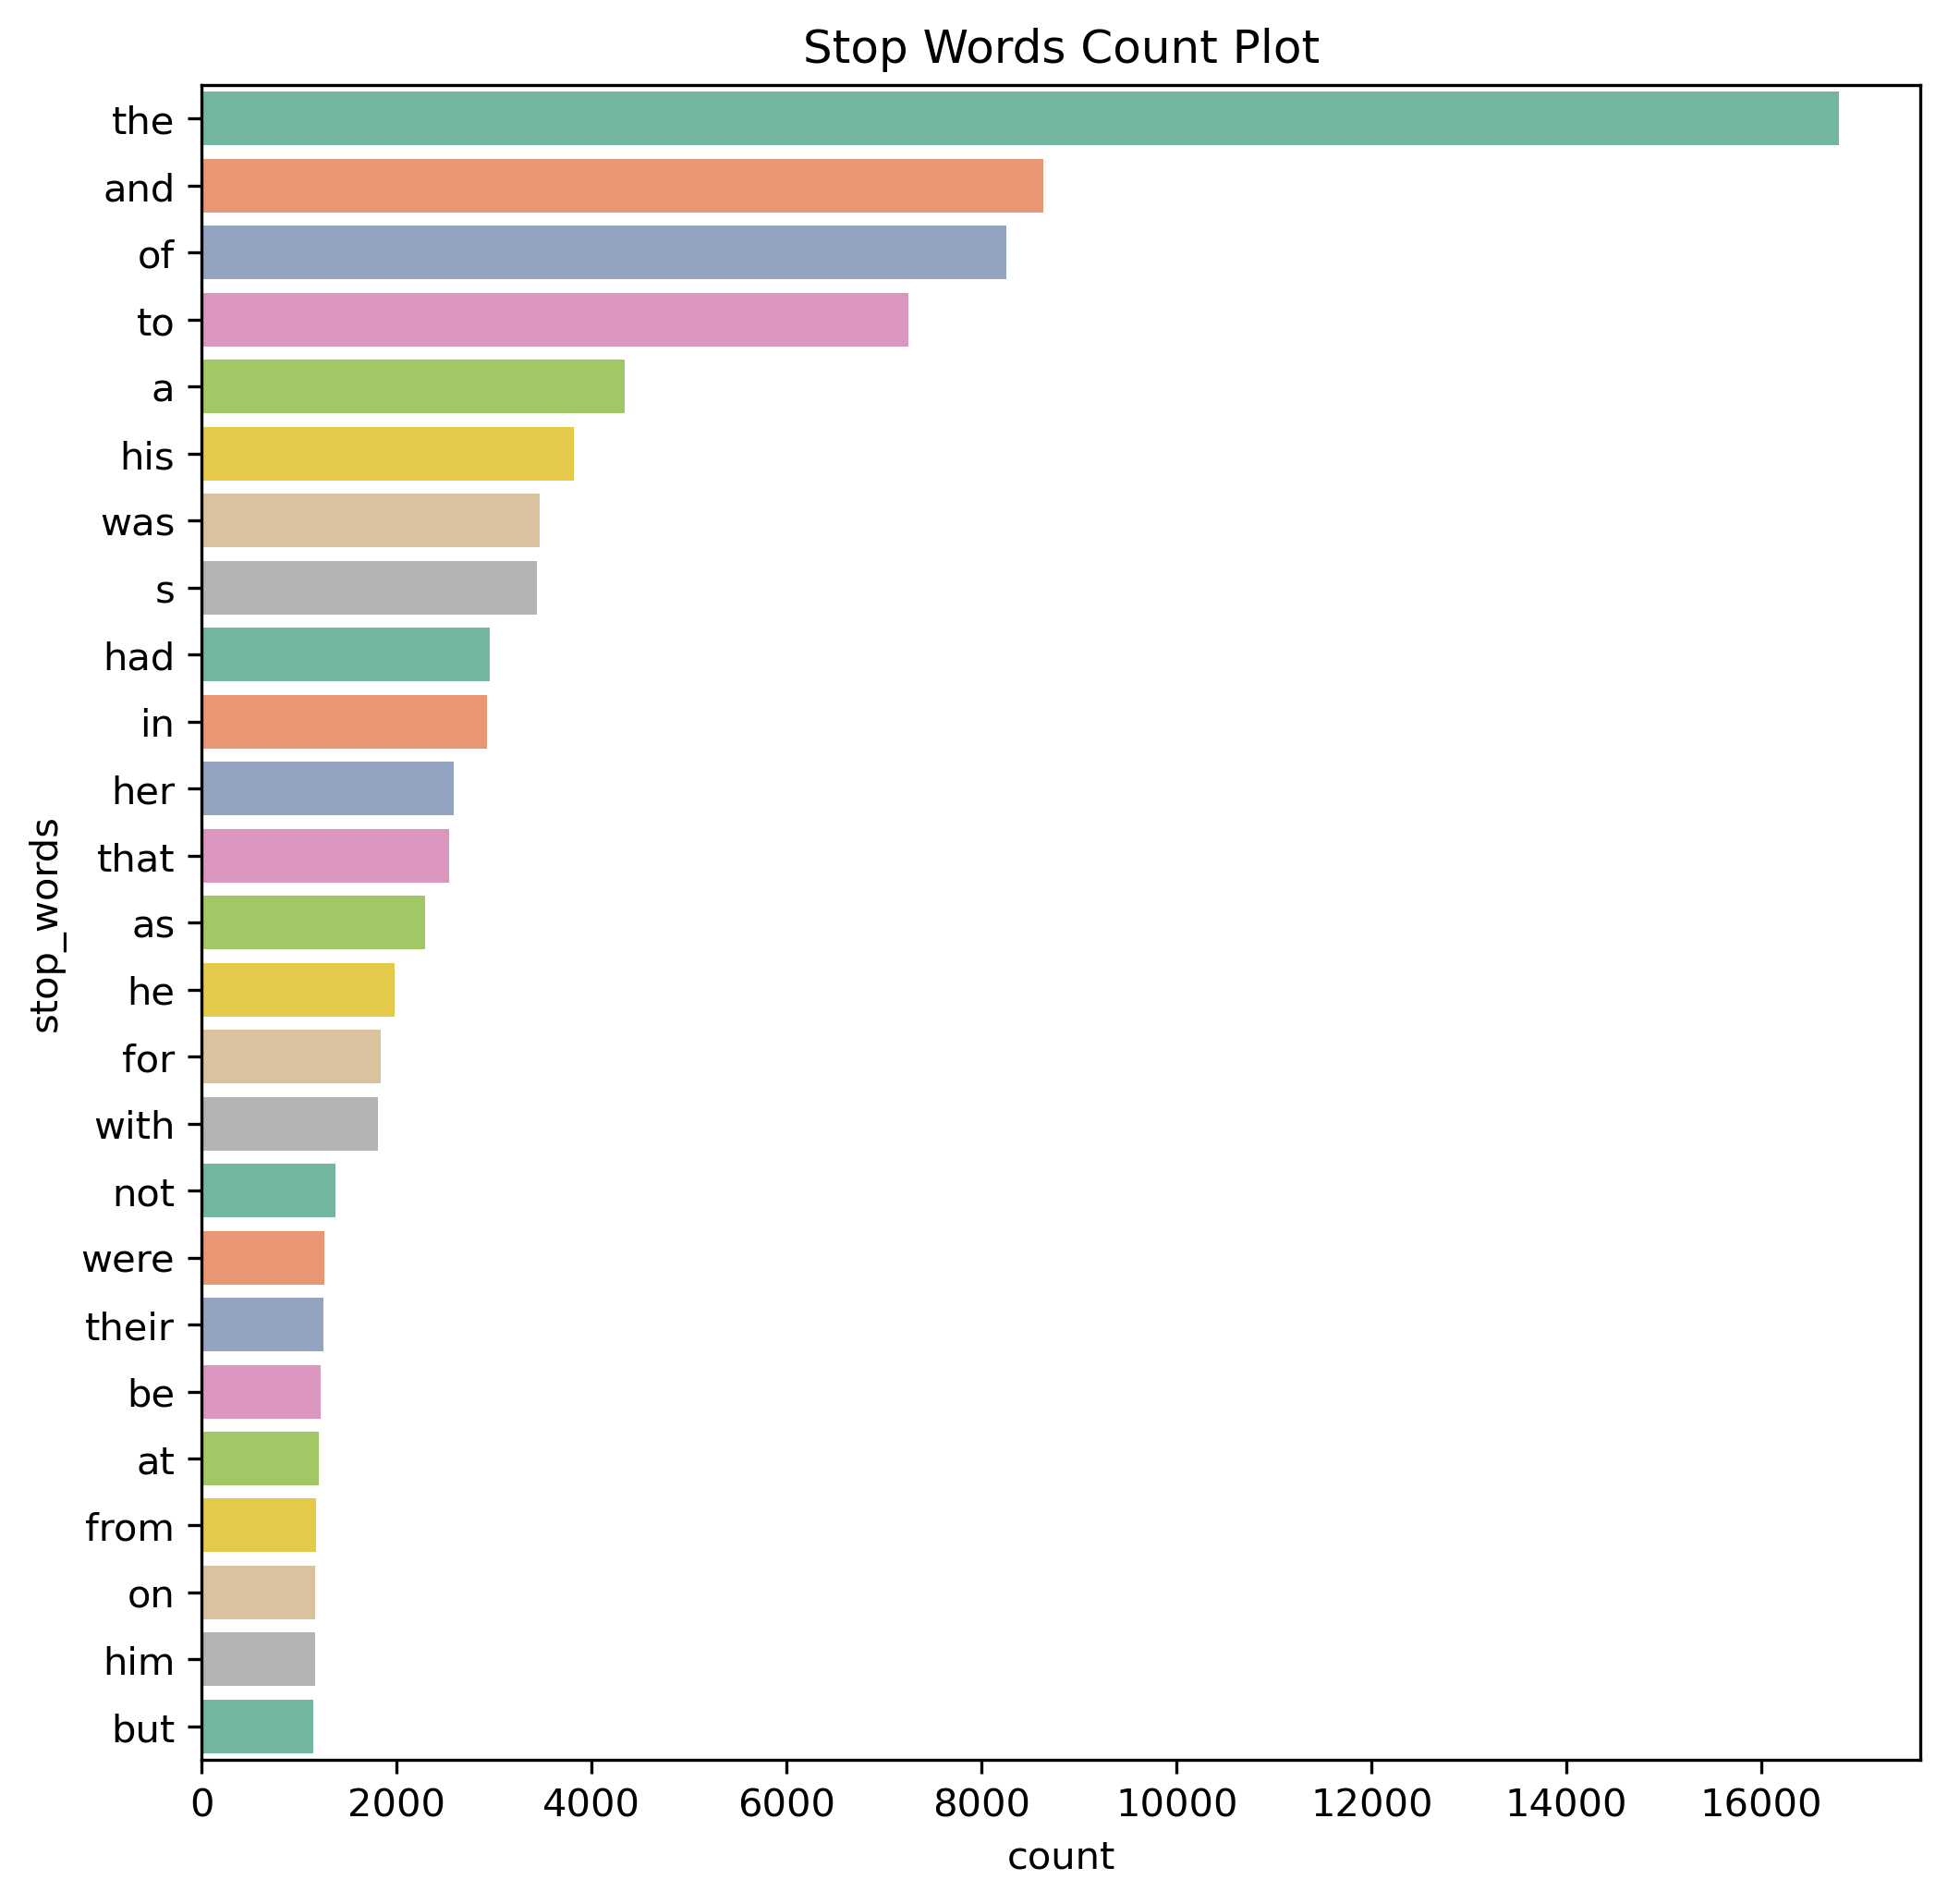

In [ ]:
top_k = 25
top_k_stop_words = paragraph_analysis.get_top_k_stop_words(stop_words_corpus, top_k=top_k)
paragraph_analysis.plot_top_k_stop_words(
    top_k_stop_words, figsize=(8, 8), dpi=300, save_flag=False)

#### Checking Non-Stop Words

In [ ]:
non_stop_words_corpus = paragraph_analysis.get_non_stop_words_corpus(language='english')
styled_print(f"Found {len(non_stop_words_corpus.keys())} unique non-stop words", header=True)

› Found 14170 unique non-stop words


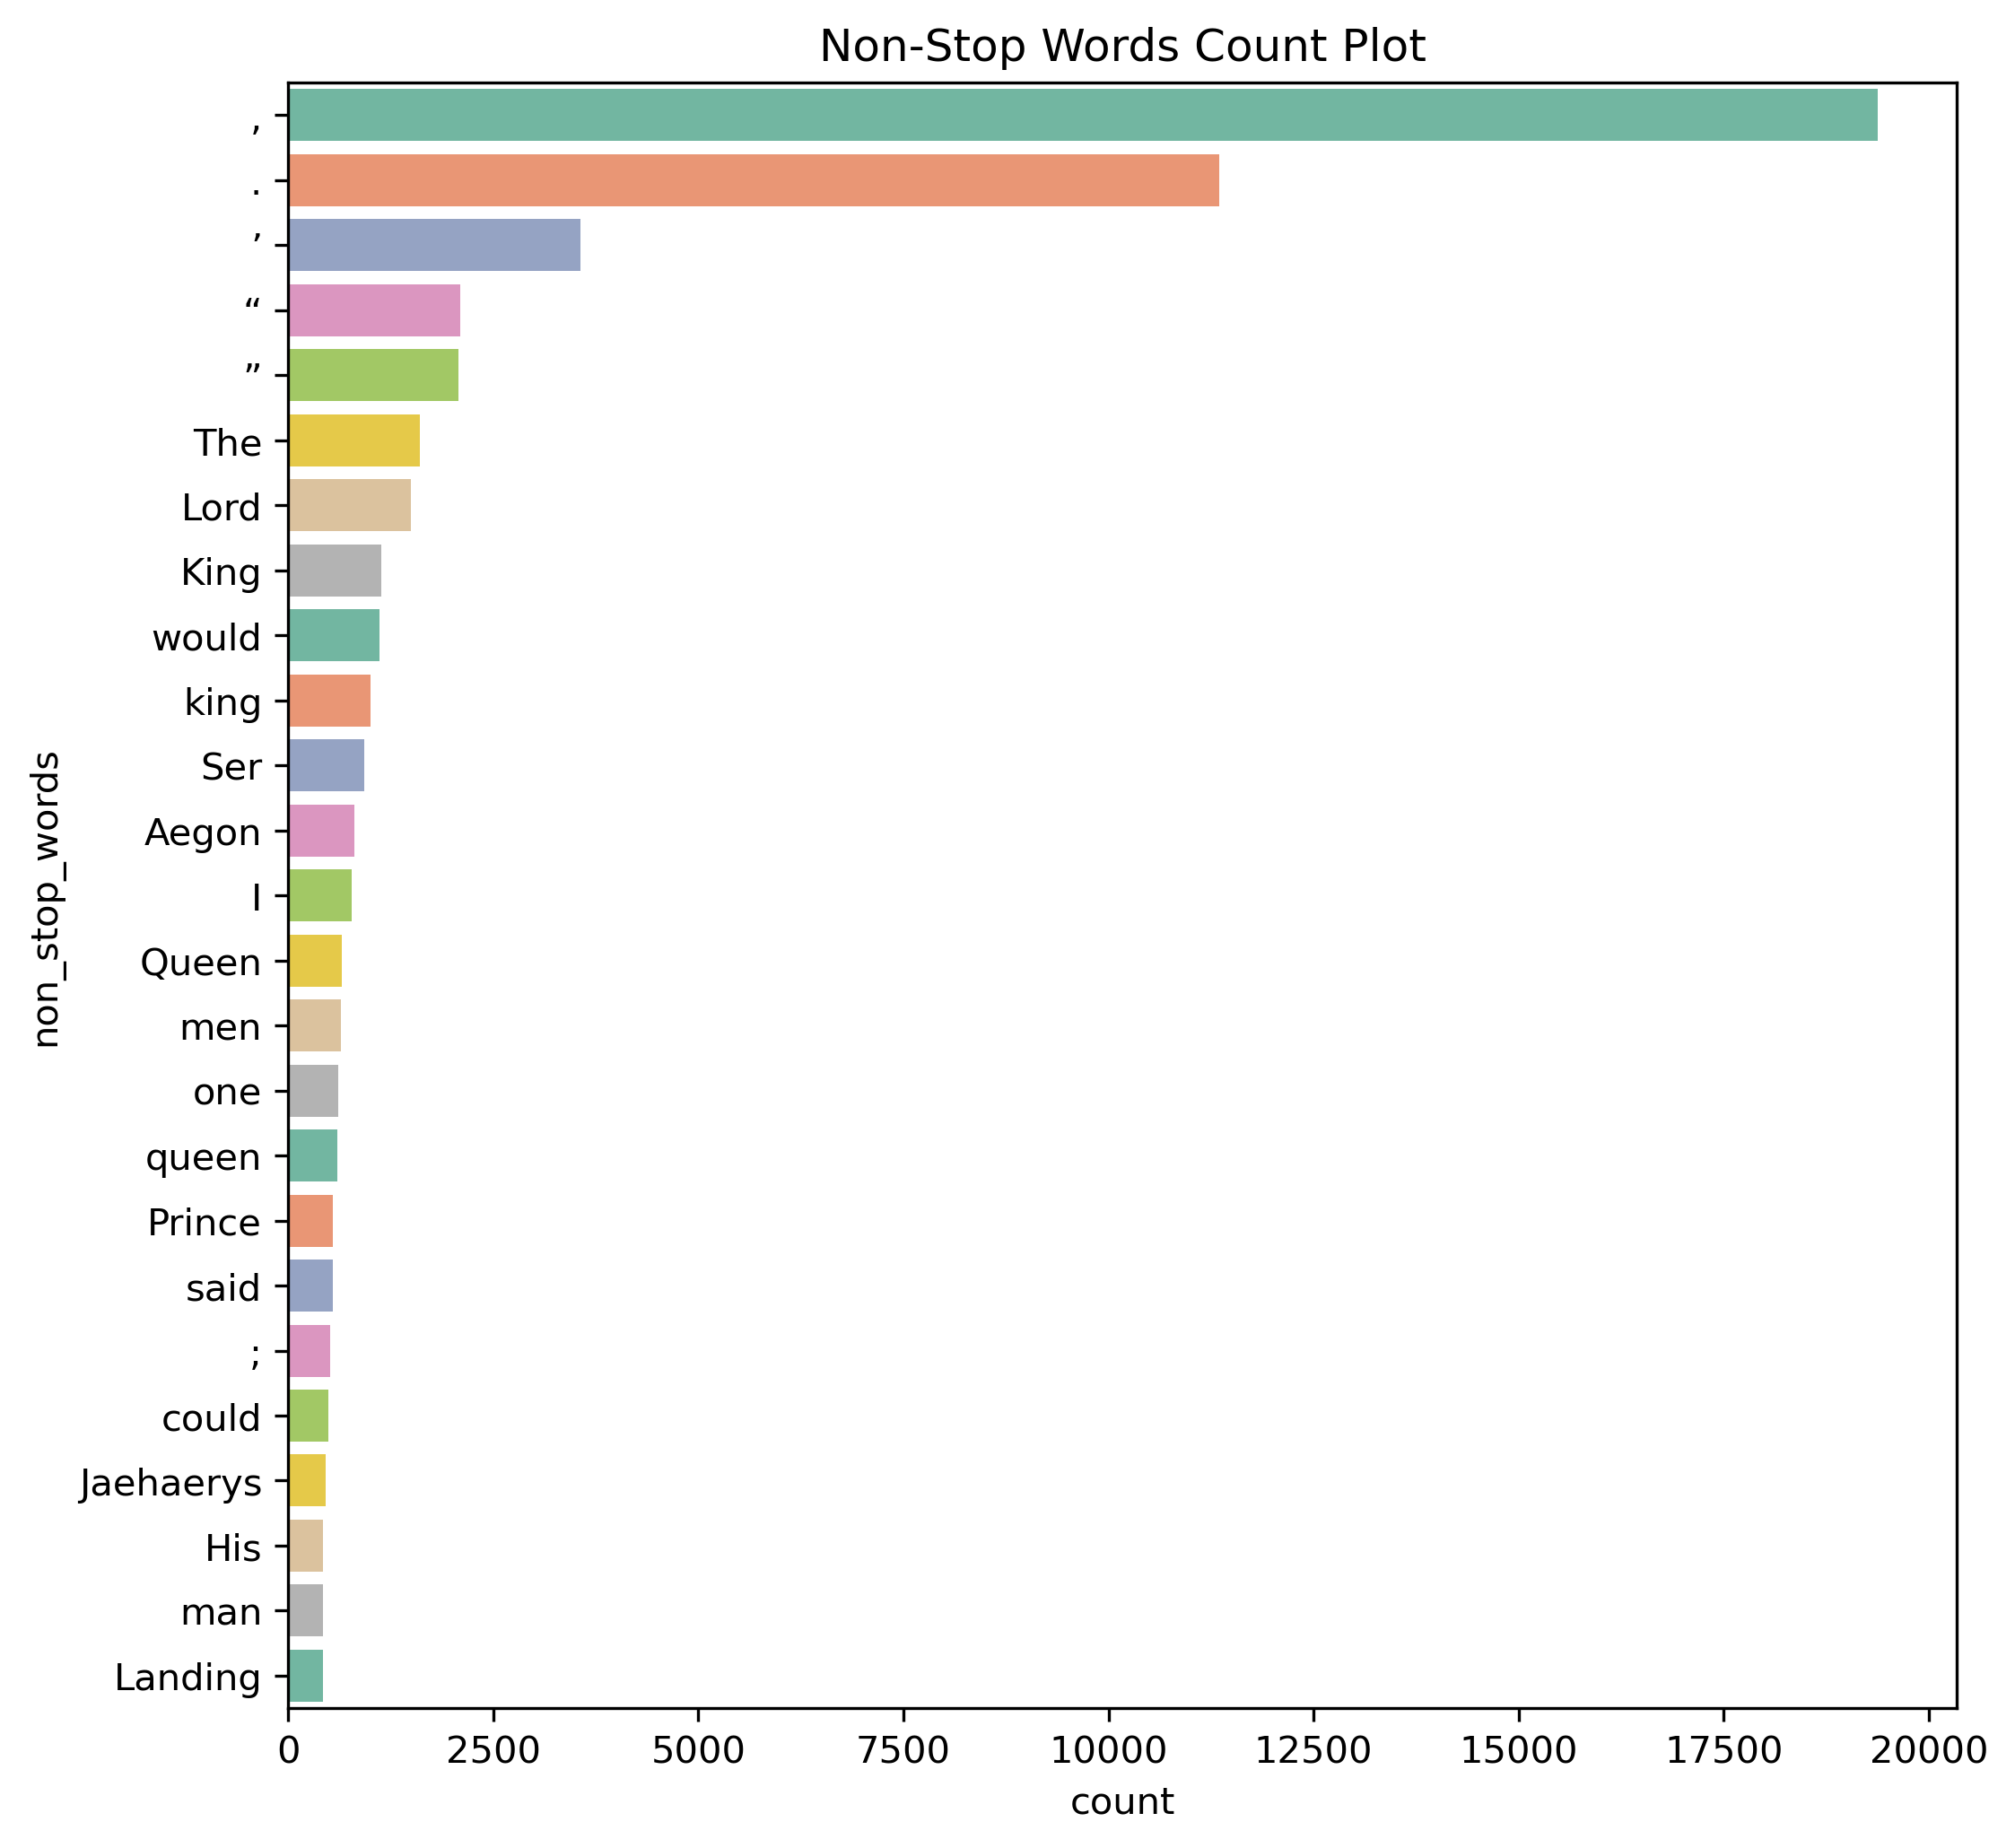

In [ ]:
top_k = 25
top_k_non_stop_words = paragraph_analysis.get_top_k_non_stop_words(non_stop_words_corpus, top_k=top_k)
paragraph_analysis.plot_top_k_non_stop_words(
    top_k_non_stop_words, figsize=(8, 8), dpi=300, save_flag=False)

#### Bi-Gram Analysis

In [ ]:
bigrams = paragraph_analysis.get_ngrams(n=2, return_list=True)
styled_print(f"Found {len(bigrams)} Bigrams", header=True)

› Found 299335 Bigrams


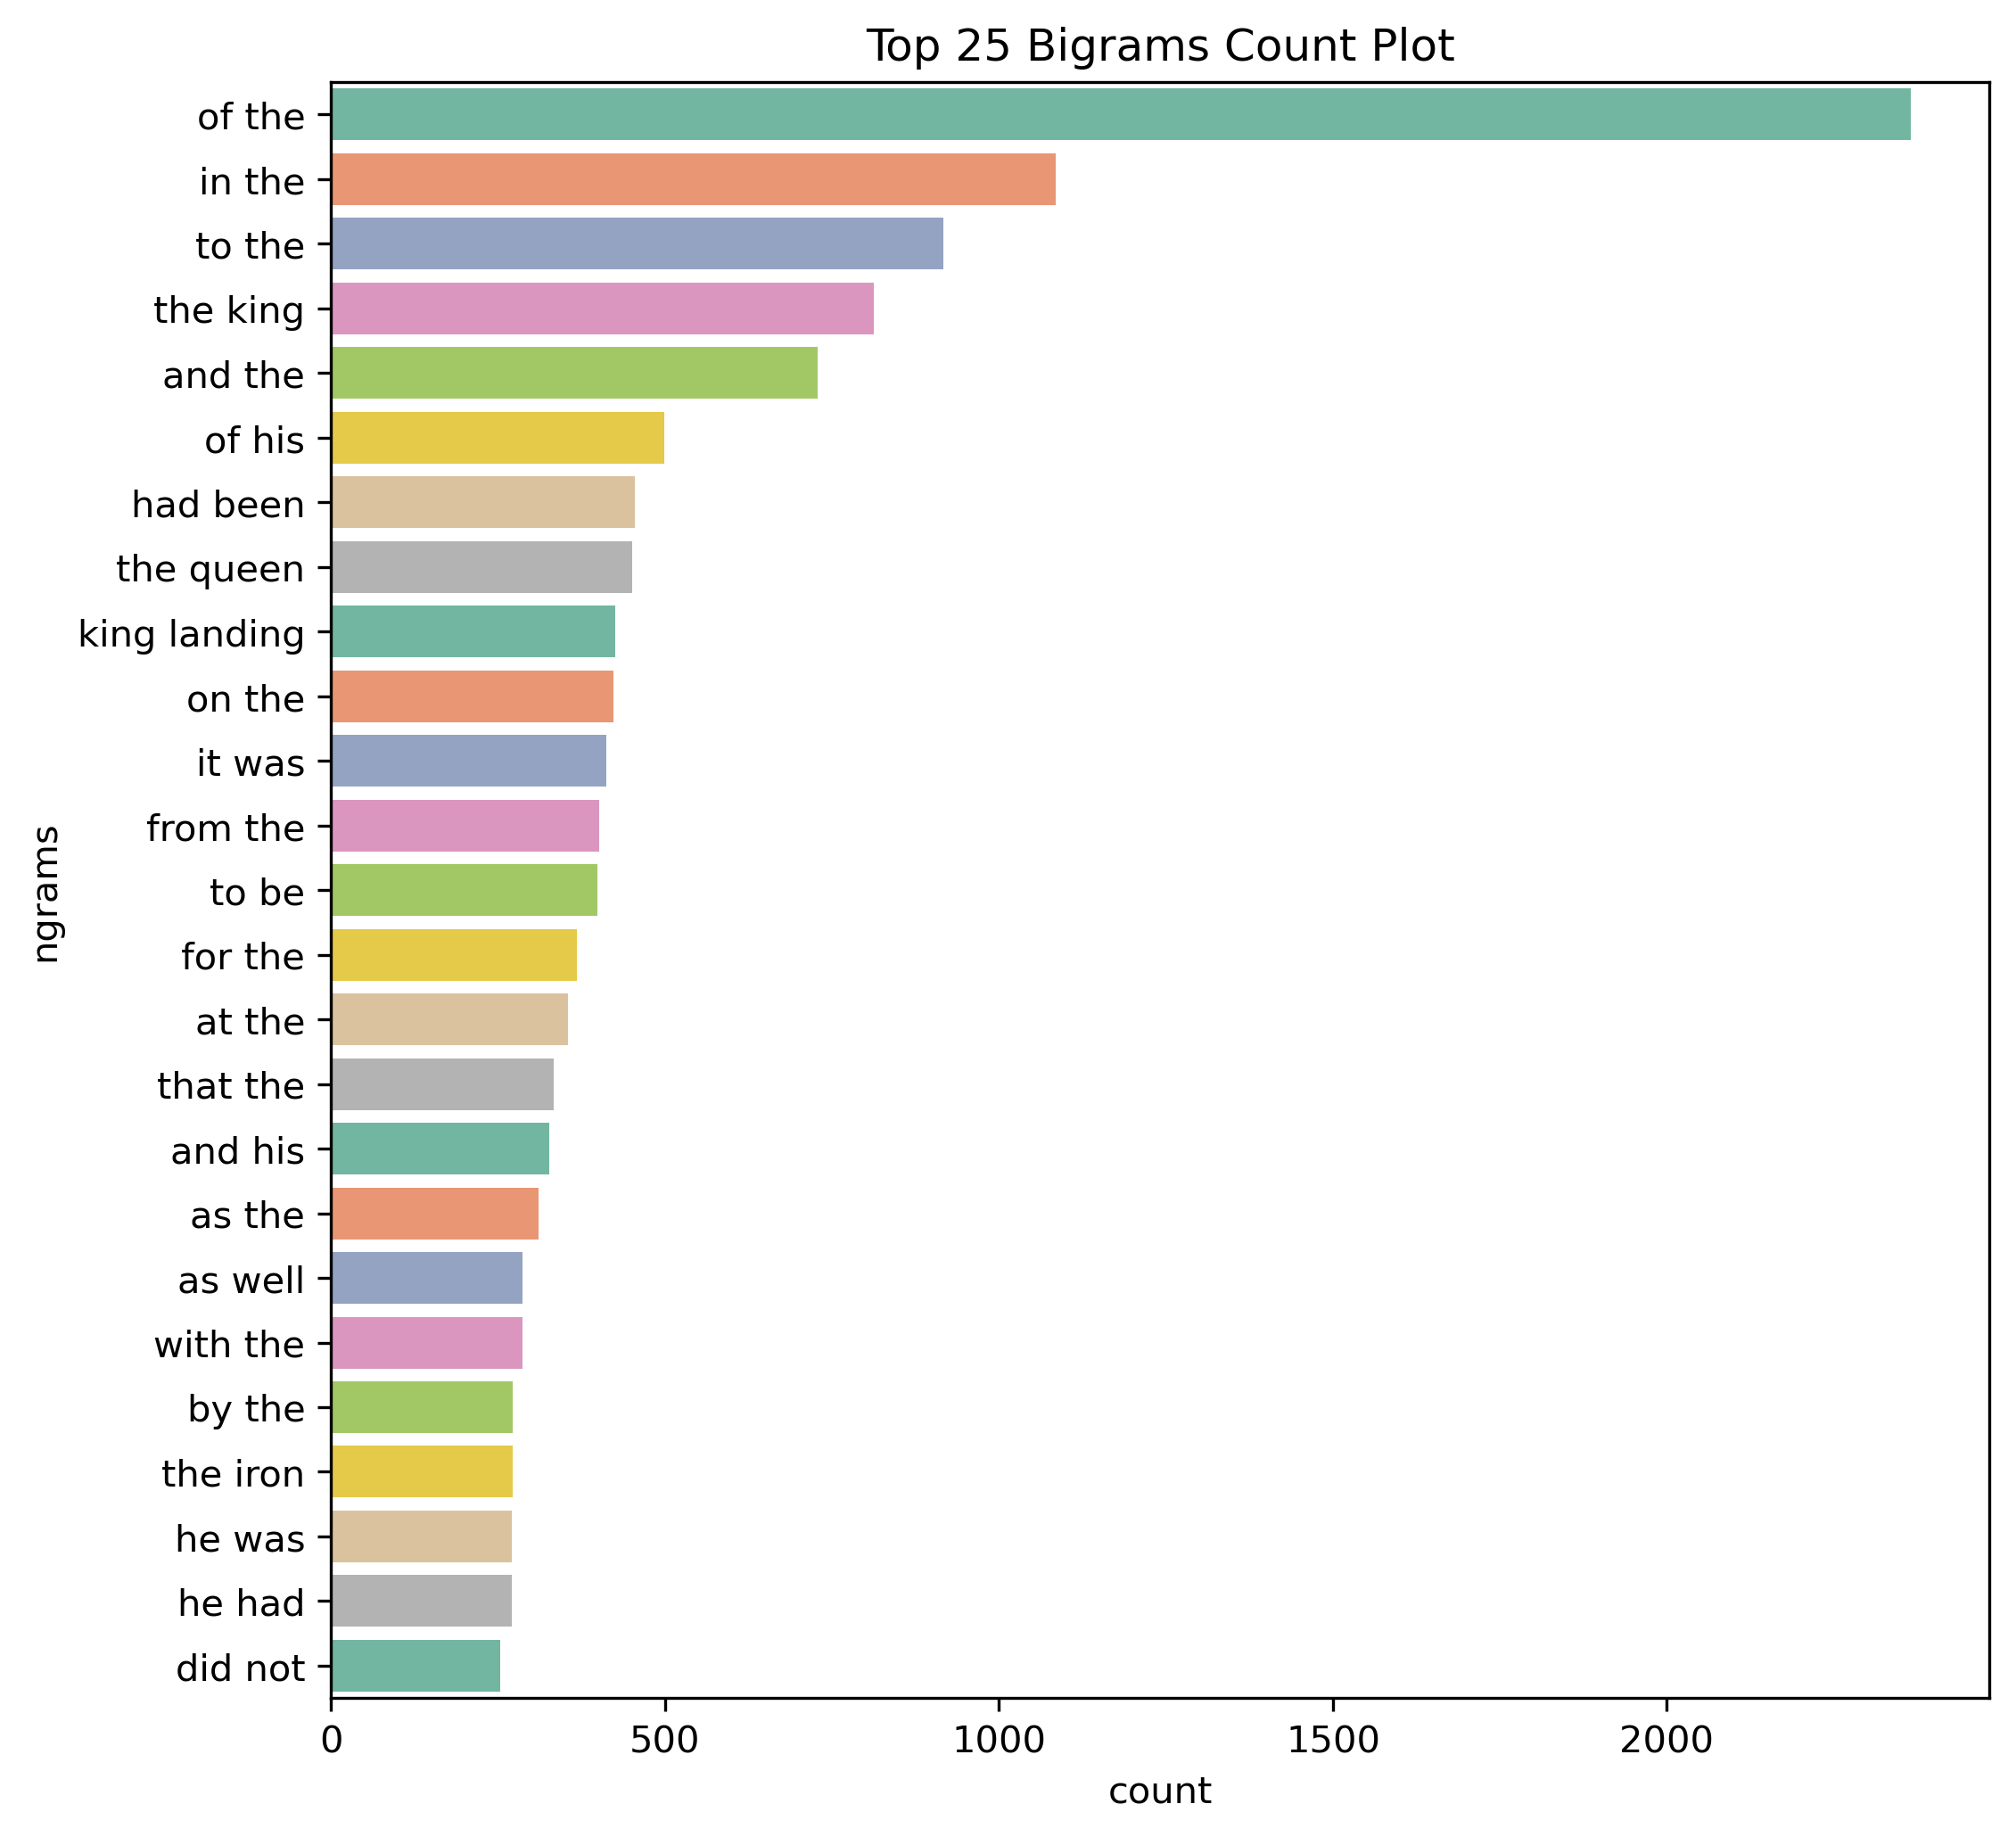

In [ ]:
top_k = 25
top_k_bigrams = paragraph_analysis.get_top_k_ngrams(n=2, top_k=top_k)
paragraph_analysis.plot_top_k_ngrams(
    top_k_bigrams, title=f"Top {top_k} Bigrams Count Plot", figsize=(8, 8), dpi=300, save_flag=False)

#### Trigram Analysis

In [ ]:
trigrams = paragraph_analysis.get_ngrams(n=3, return_list=True)
styled_print(f"Found {len(trigrams)} Trigrams", header=True)

› Found 299334 Trigrams


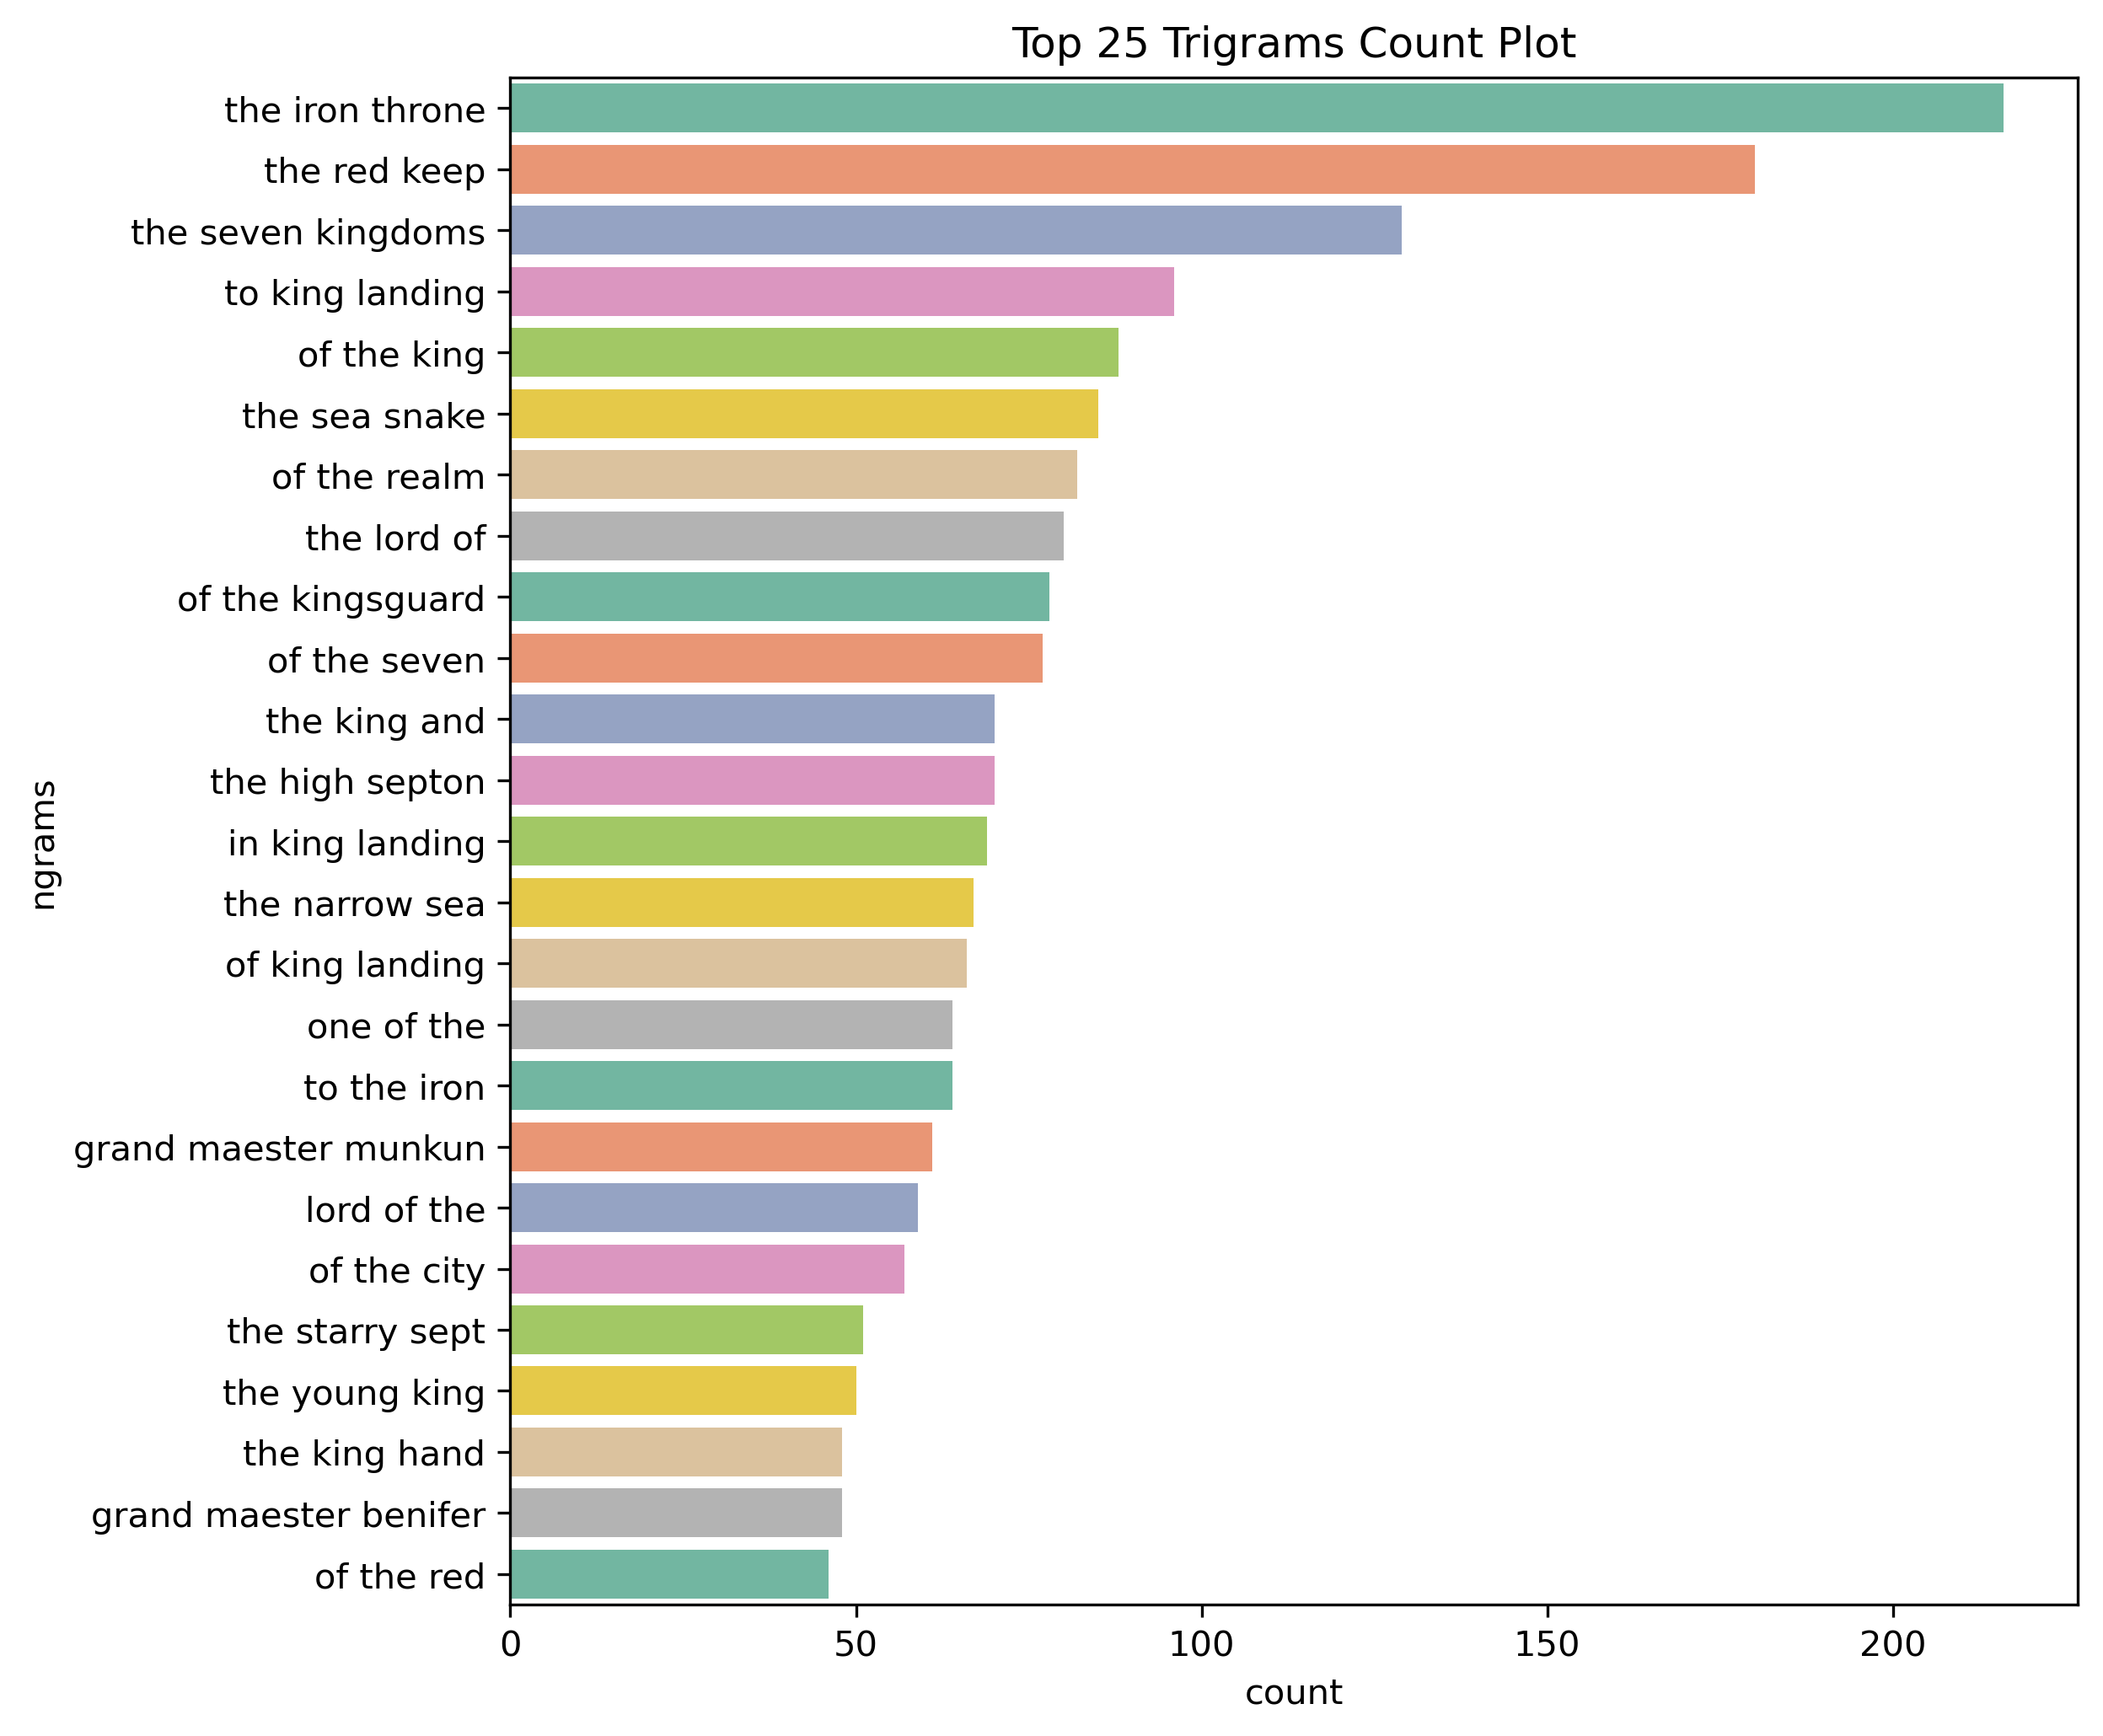

In [ ]:
top_k = 25
top_k_trigrams = paragraph_analysis.get_top_k_ngrams(n=3, top_k=top_k)
paragraph_analysis.plot_top_k_ngrams(
    top_k_trigrams, title=f"Top {top_k} Trigrams Count Plot", figsize=(8, 8), dpi=300, save_flag=False)

#### LDA for Topic Extraction

In [ ]:
vectorizer, lda_model, lda_vectors = paragraph_analysis.build_lda(n_components=20)

In [ ]:
paragraph_analysis.extract_topics(vectorizer, lda_model)

› Topic 0:
    › ('the', 123.03478331066012)
    › ('of', 100.92503863474595)
    › ('for', 35.912102496376214)
    › ('her', 33.65322700093932)
    › ('in', 30.675868728339196)
    › ('had', 26.100296111301503)
    › ('to', 22.703728103532786)
    › ('coryanne', 20.033886327386952)
    › ('son', 15.544861473928597)
    › ('wylde', 14.451839894523783)
› Topic 1:
    › ('wants', 7.049999999773633)
    › ('high', 6.274889333236847)
    › ('or', 4.6221630916503225)
    › ('septon', 4.472141576512116)
    › ('sept', 4.331571768462328)
    › ('wiser', 2.9984677590822053)
    › ('expected', 2.810416385991857)
    › ('naked', 2.2585490939614763)
    › ('frighten', 2.050000008403785)
    › ('drawing', 2.050000004974412)
› Topic 2:
    › ('the', 1107.4893579535437)
    › ('to', 1106.4912105122398)
    › ('and', 939.1077257403175)
    › ('you', 580.6212461593248)
    › ('her', 438.1364725379278)
    › ('not', 427.1671855633837)
    › ('that', 390.55894349455303)
    › ('of', 389.100919277104)
  

### Analysis of Cleaned Paragraphs

In [ ]:
out_dir = create_dir("../data", "analysis-data")
paragraph_analysis = ParagraphAnalysis(
    cleaned_paragraphs, 
    out_dir=out_dir
)
styled_print(f"Found {paragraph_analysis.words_counts} Words.", header=True)

› creating directory ... ../data/analysis-data
› Found 145723 Words.


#### Histogram of Paragraph Lengths

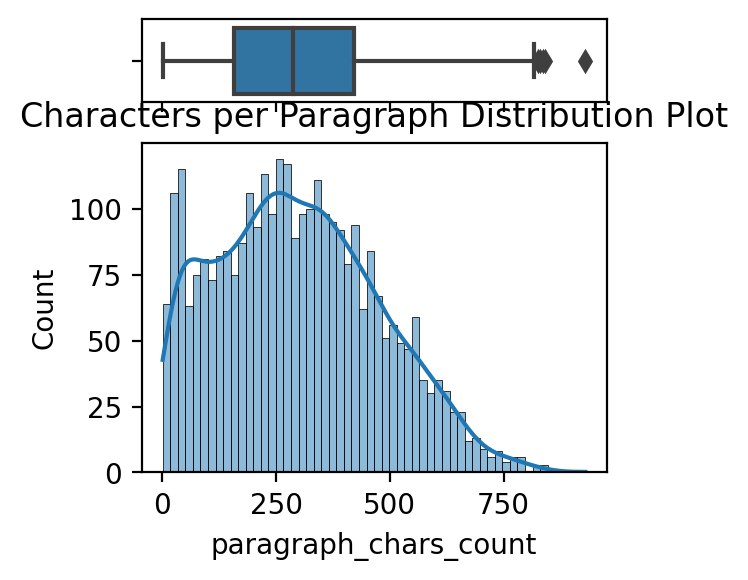

In [ ]:
paragraph_analysis.characters_per_paragraph_histogram(
    figsize=(3, 3), dpi=200, save_flag=False
)

#### Histogram of Words per Paragraph

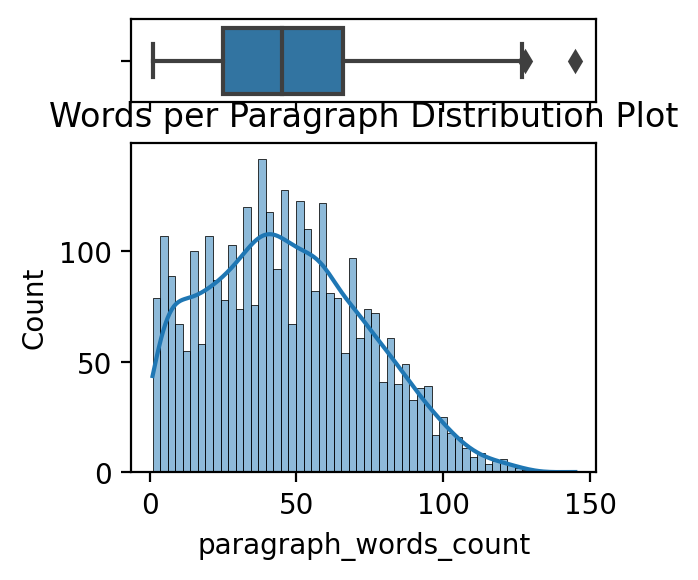

In [ ]:
paragraph_analysis.words_per_paragraph_histogram(
    figsize=(3, 3), dpi=200, save_flag=False
)

#### Histogram of Avg Word Lenghth per Paragraph

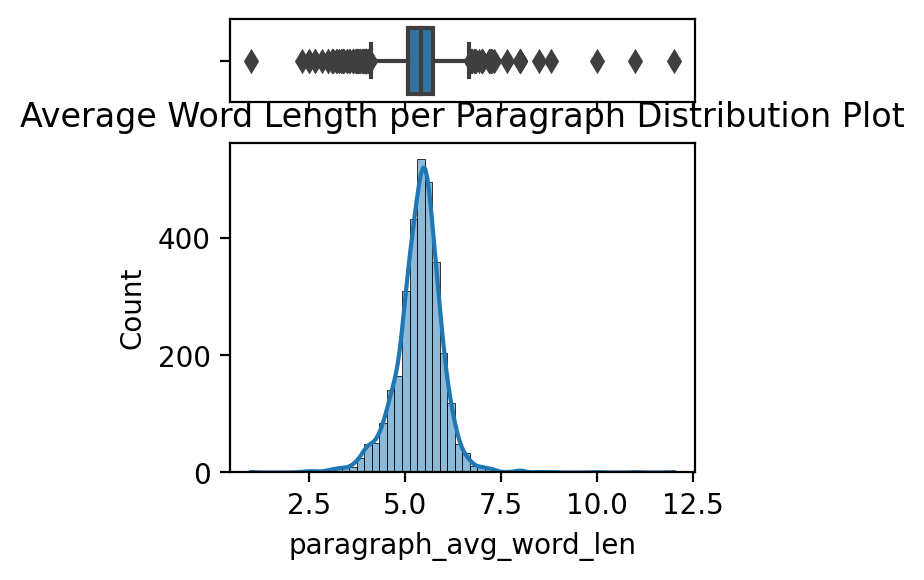

In [ ]:
paragraph_analysis.avg_word_len_per_paragraph_histogram(
    figsize=(3, 3), dpi=200, save_flag=False
)

#### Checking Stop Words

In [ ]:
stop_words_corpus = paragraph_analysis.get_stop_words_corpus(language='english')
styled_print(f"Found {len(stop_words_corpus.keys())} unique stop words", header=True)

› Found 1 unique stop words


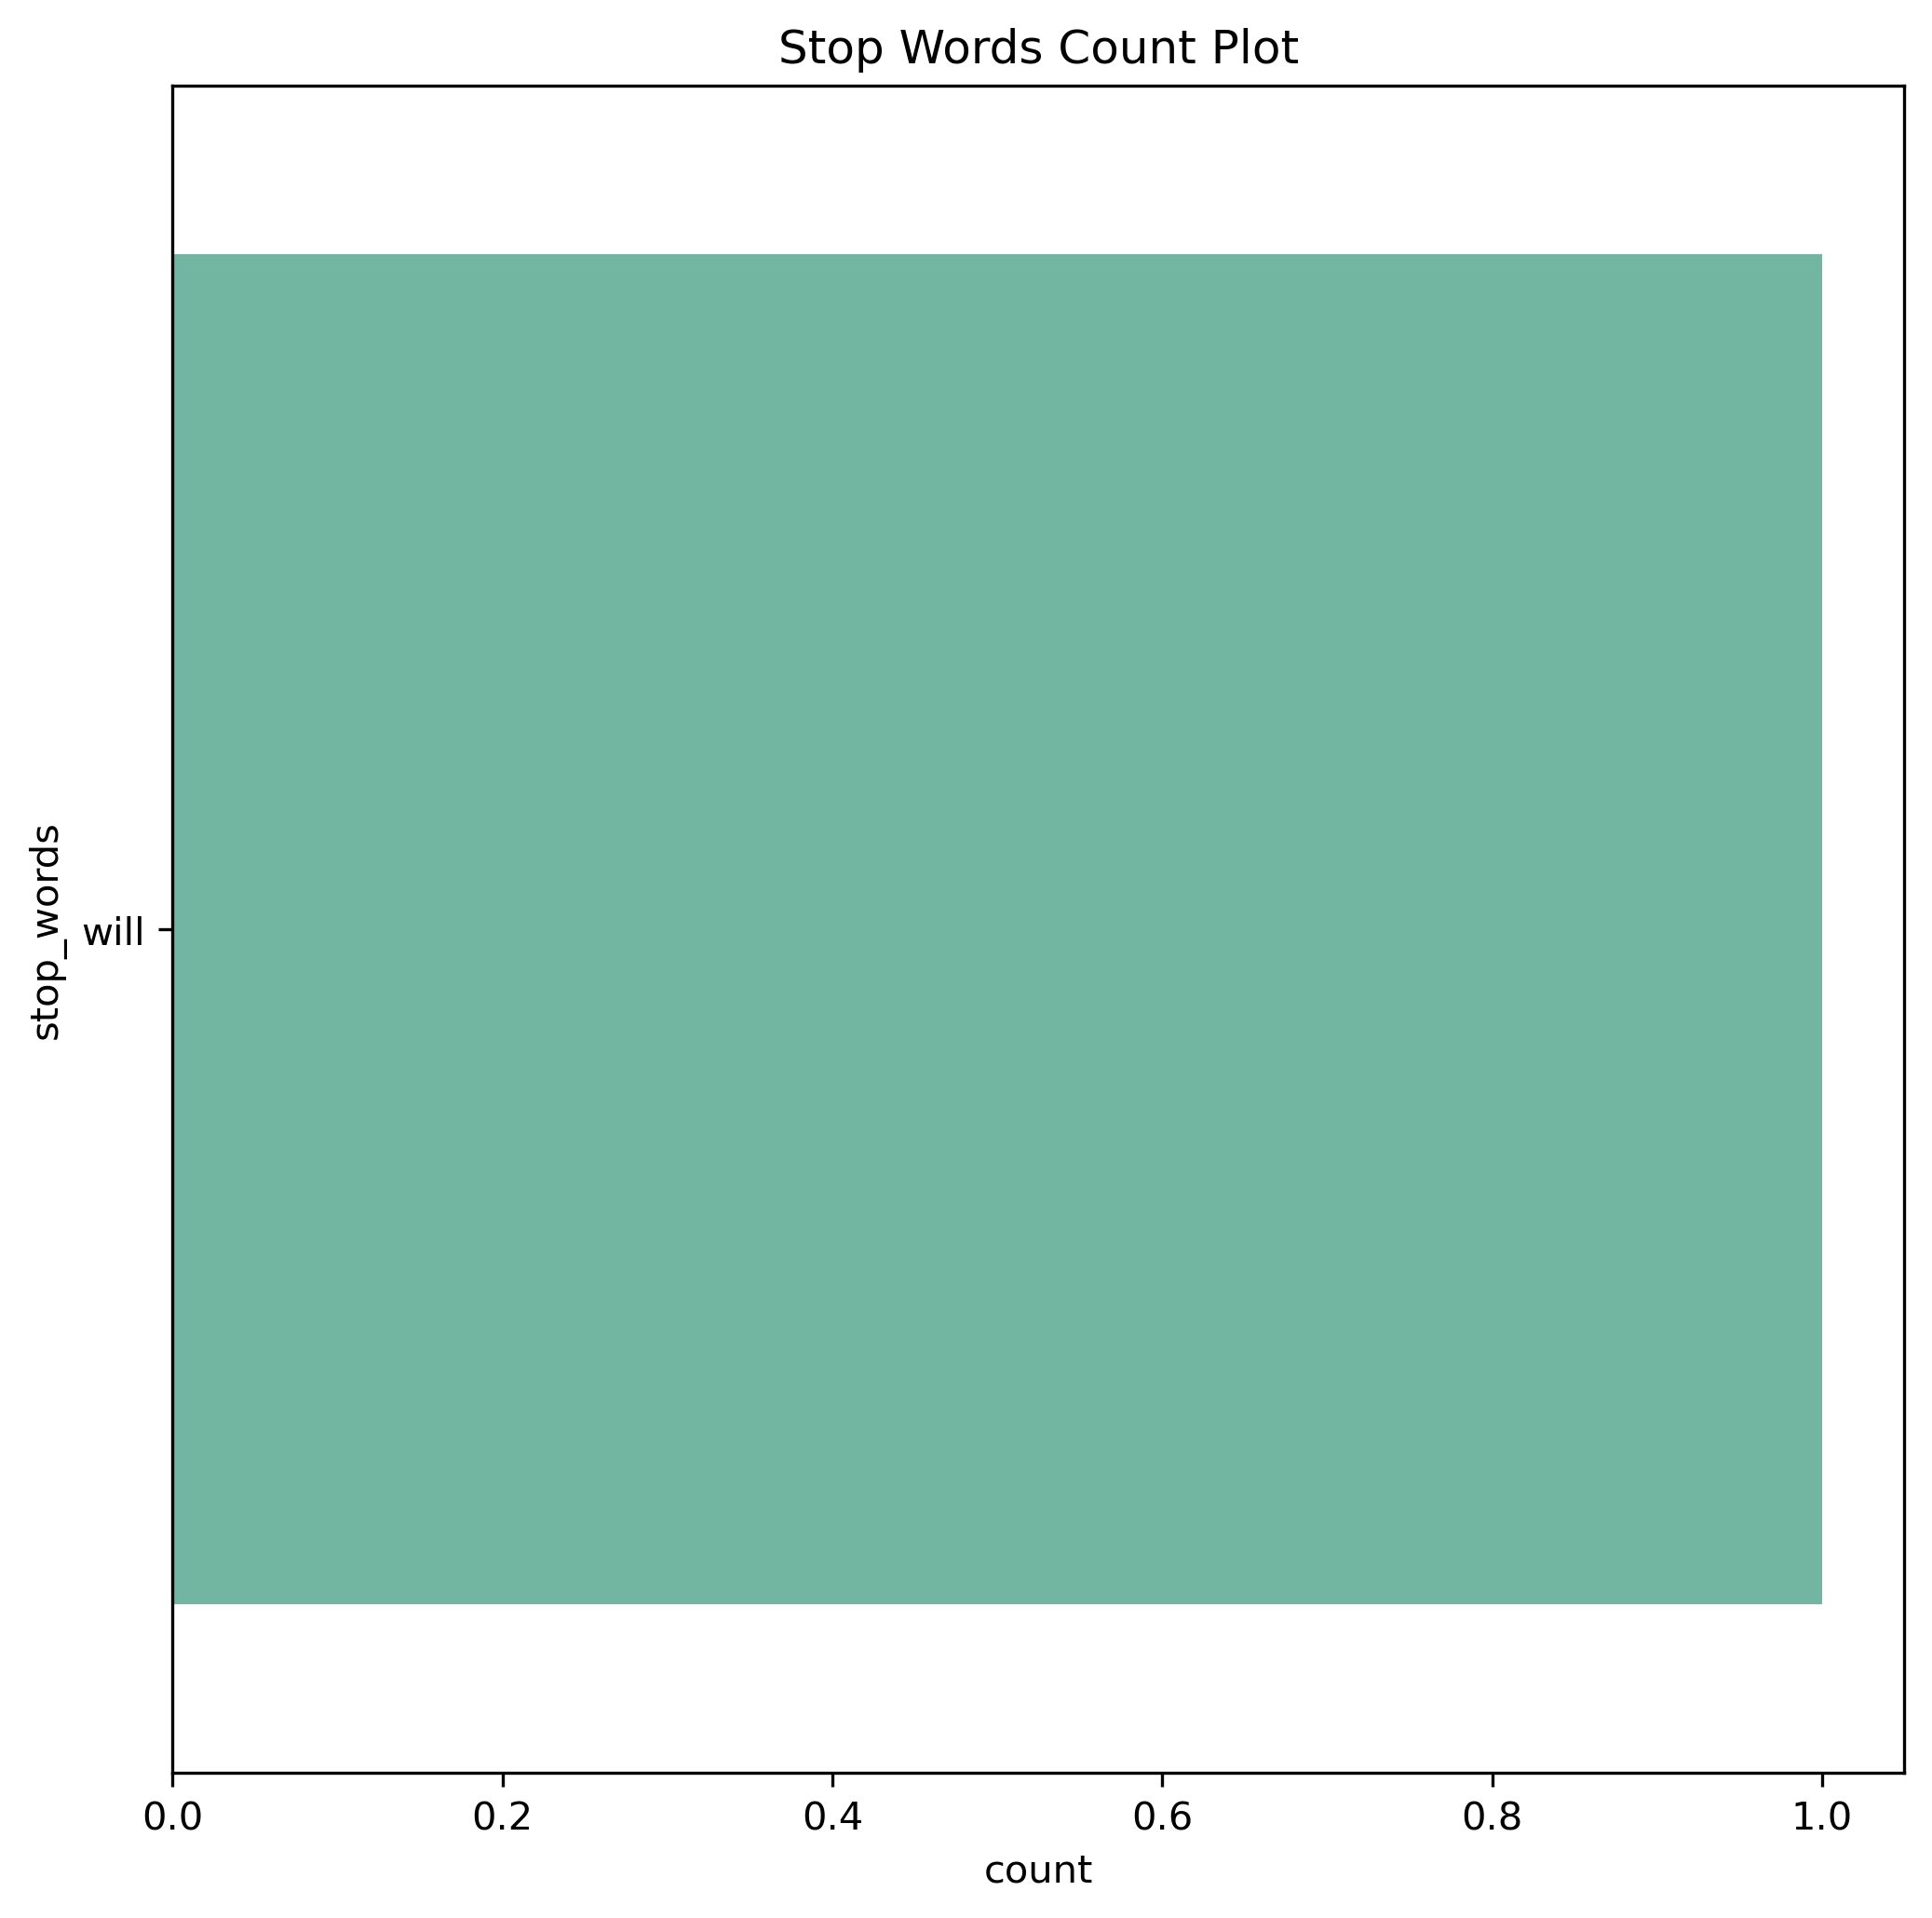

In [ ]:
top_k = 25
top_k_stop_words = paragraph_analysis.get_top_k_stop_words(stop_words_corpus, top_k=top_k)
paragraph_analysis.plot_top_k_stop_words(
    top_k_stop_words, figsize=(8, 8), dpi=300, save_flag=False)

#### Checking Non-Stop Words

In [ ]:
non_stop_words_corpus = paragraph_analysis.get_non_stop_words_corpus(language='english')
styled_print(f"Found {len(non_stop_words_corpus.keys())} unique non-stop words", header=True)

› Found 10888 unique non-stop words


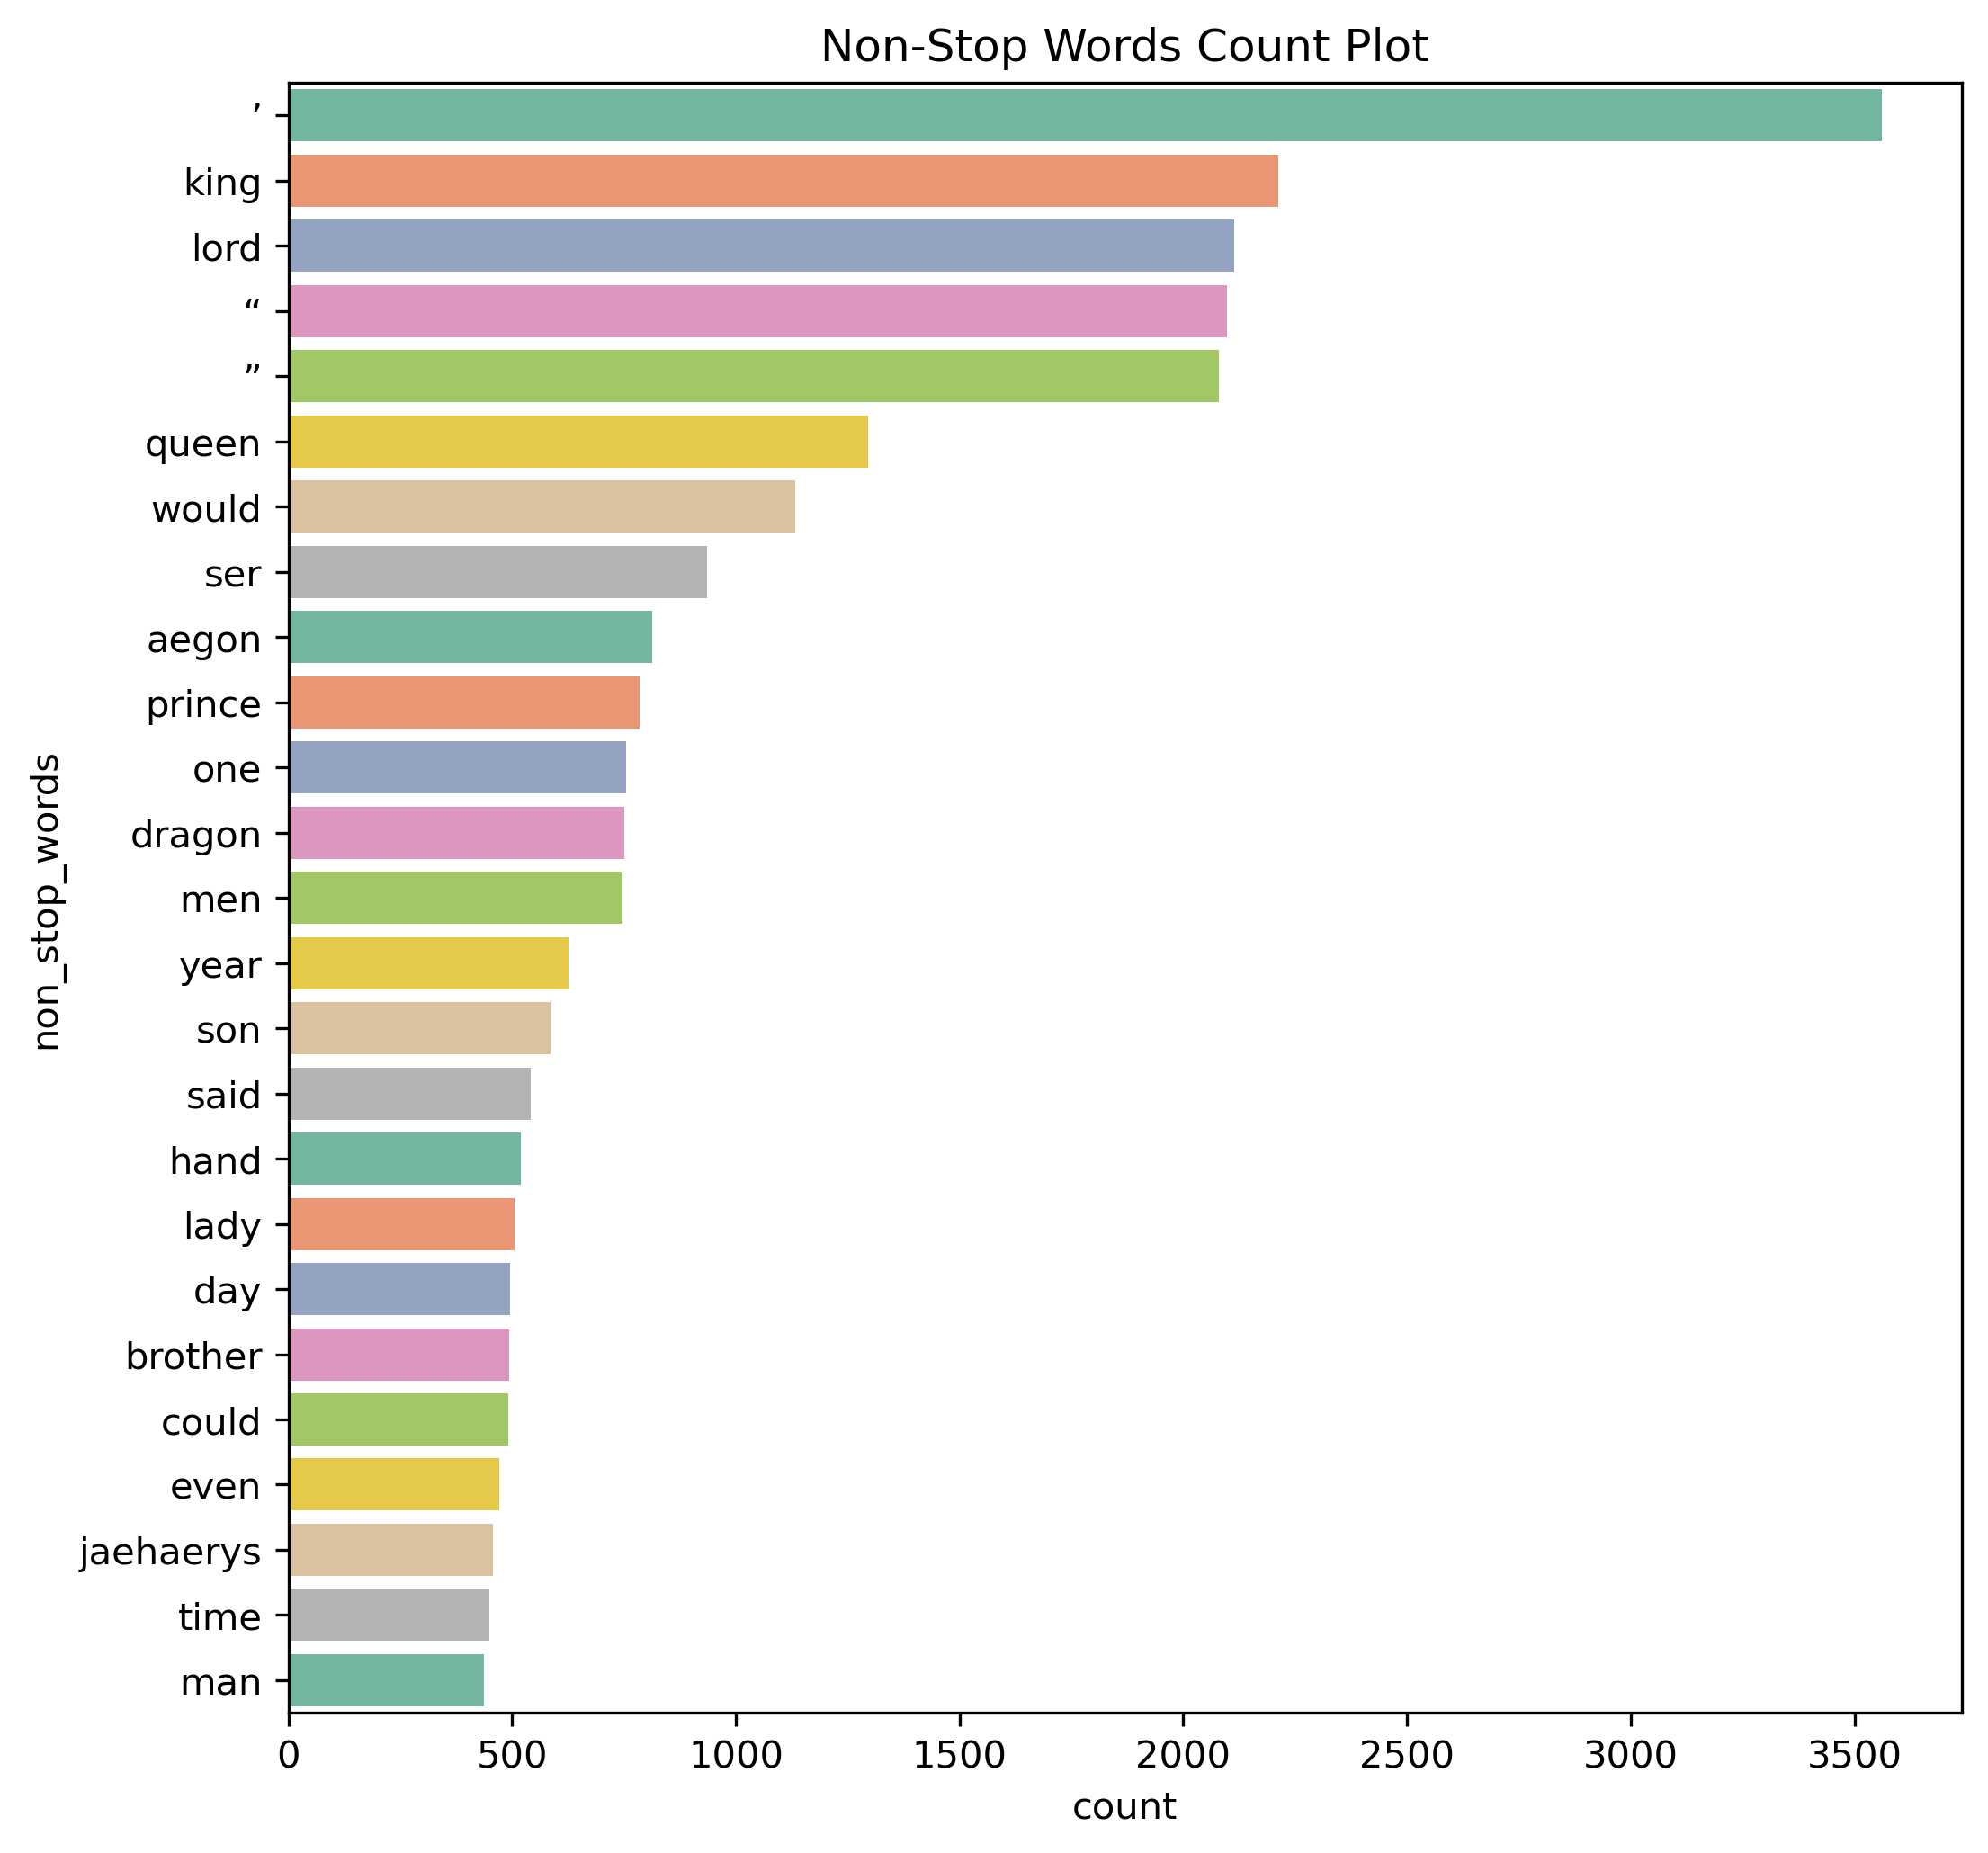

In [ ]:
top_k = 25
top_k_non_stop_words = paragraph_analysis.get_top_k_non_stop_words(non_stop_words_corpus, top_k=top_k)
paragraph_analysis.plot_top_k_non_stop_words(
    top_k_non_stop_words, figsize=(8, 8), dpi=300, save_flag=False)

#### Bi-Gram Analysis

In [ ]:
bigrams = paragraph_analysis.get_ngrams(n=2, return_list=True)
styled_print(f"Found {len(bigrams)} Bigrams", header=True)

› Found 145722 Bigrams


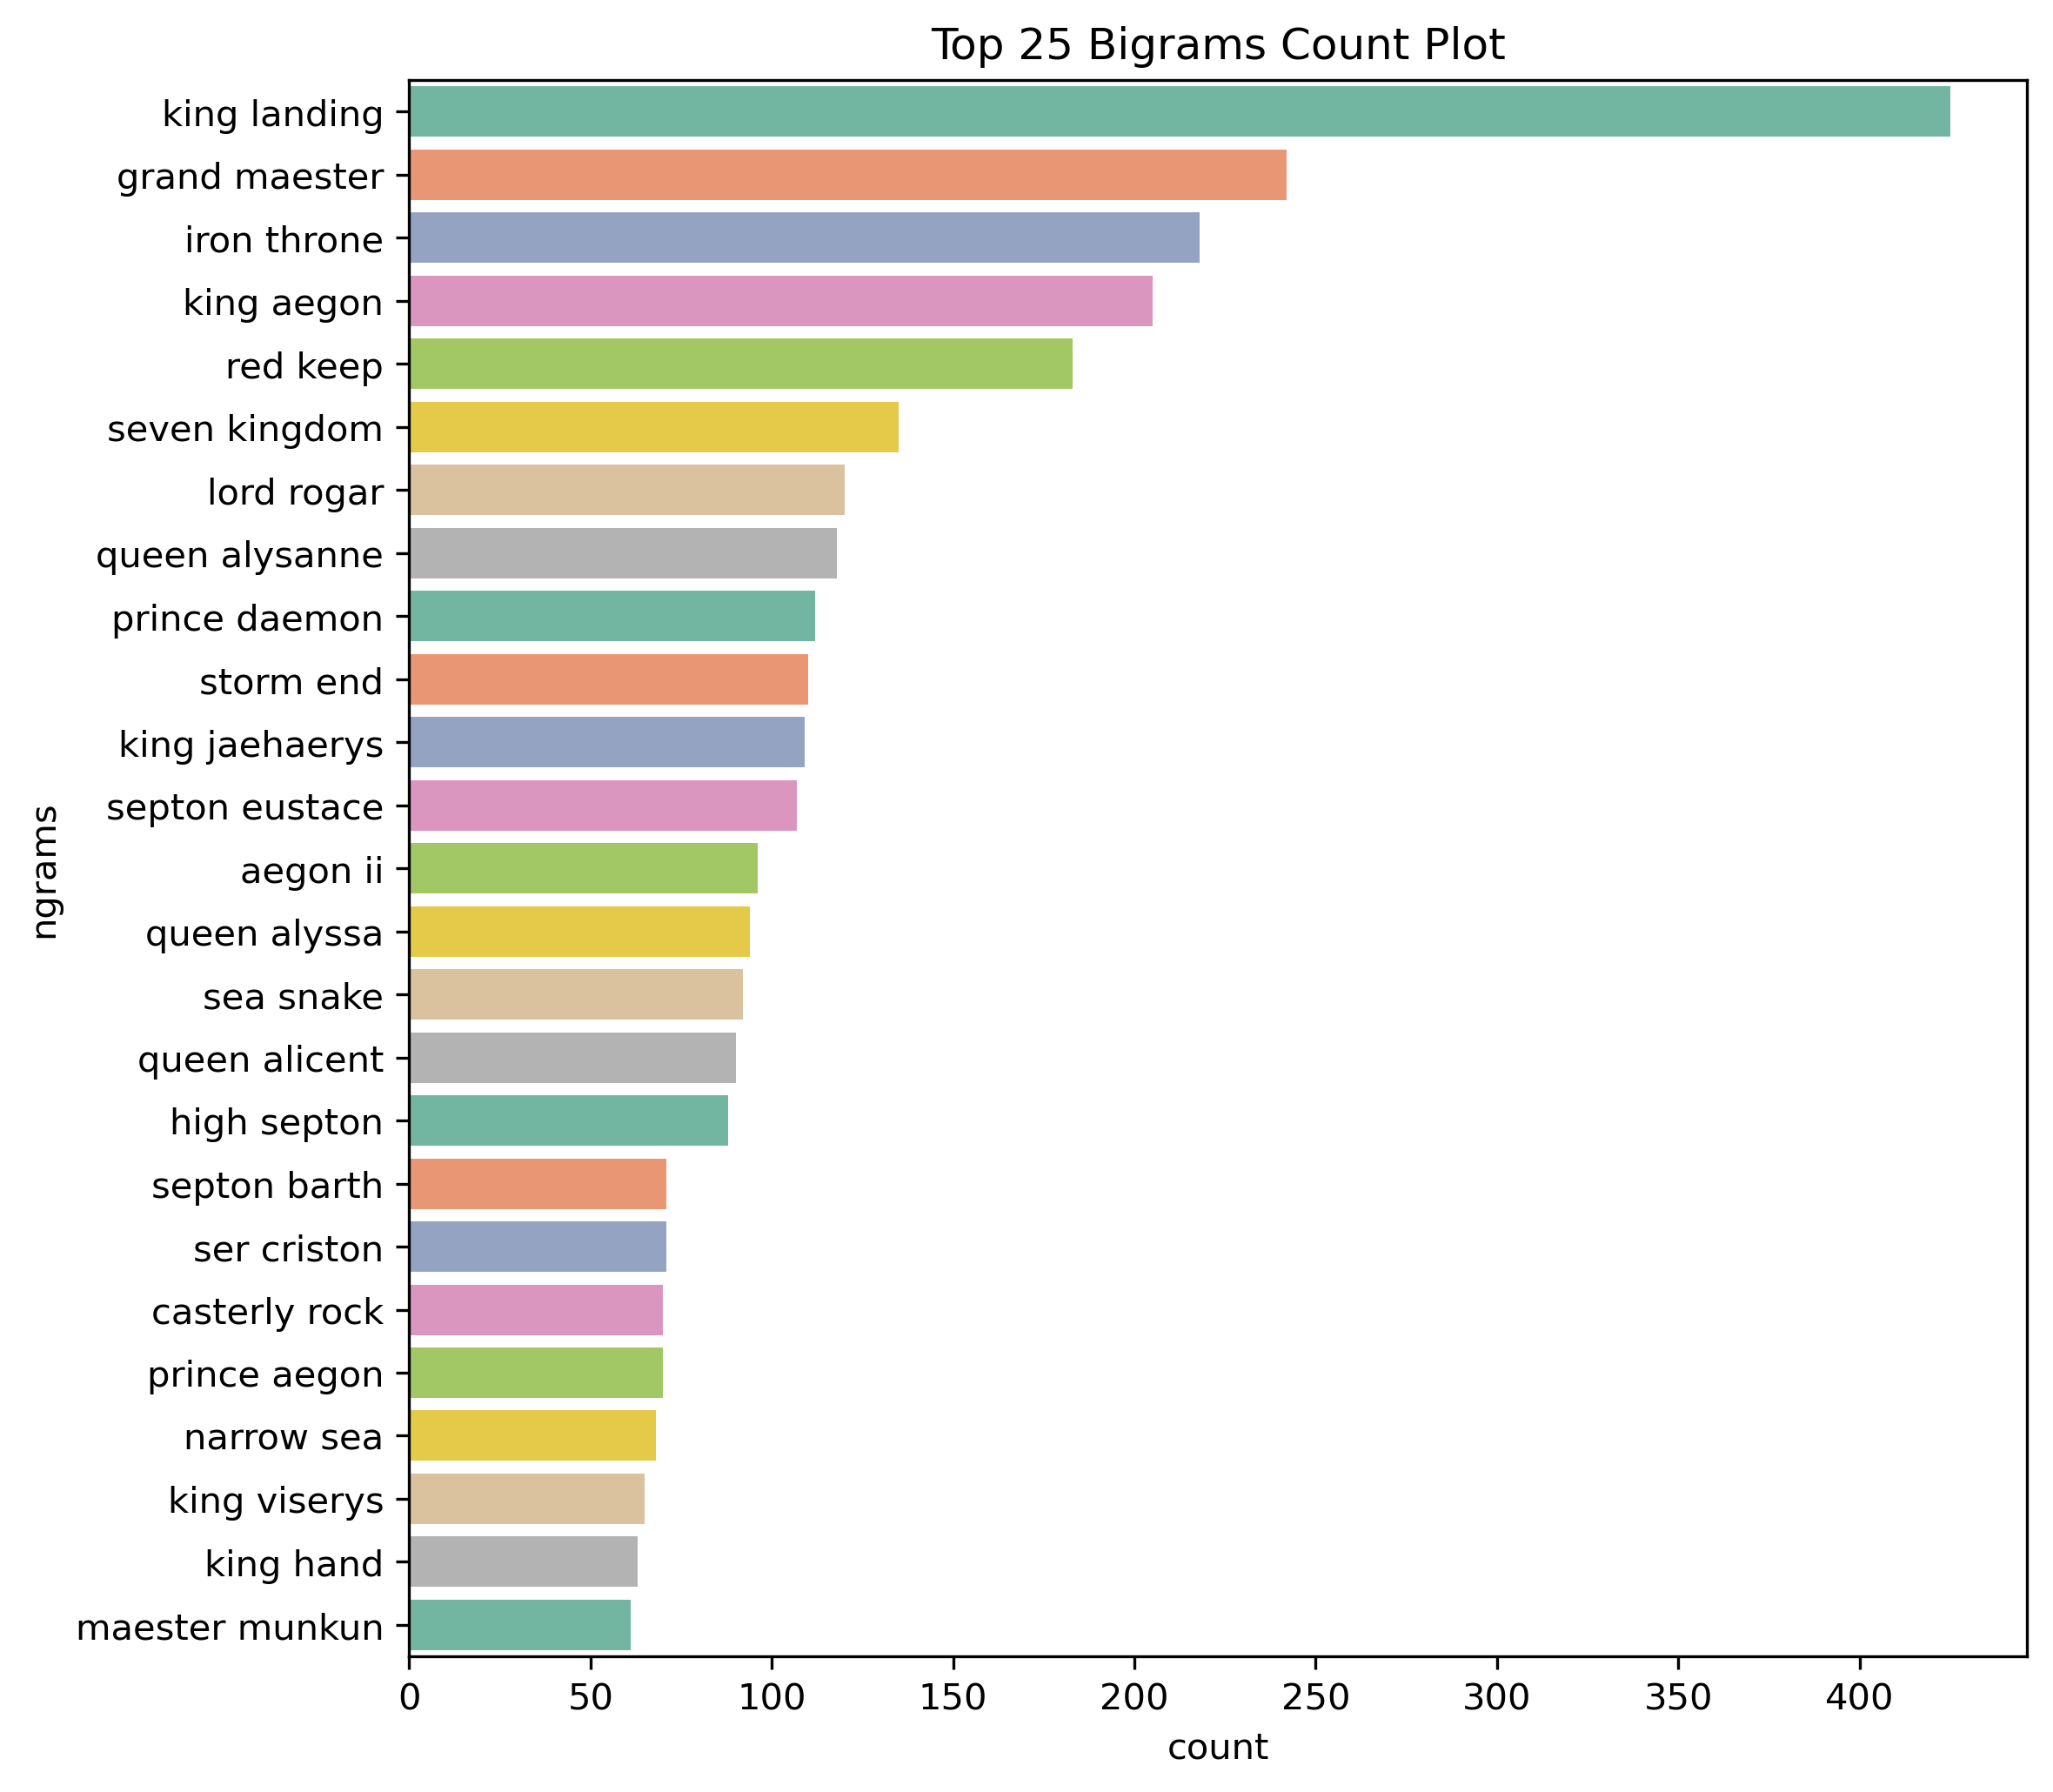

In [ ]:
top_k = 25
top_k_bigrams = paragraph_analysis.get_top_k_ngrams(n=2, top_k=top_k)
paragraph_analysis.plot_top_k_ngrams(
    top_k_bigrams, title=f"Top {top_k} Bigrams Count Plot", figsize=(8, 8), dpi=300, save_flag=False)

#### Trigram Analysis

In [ ]:
trigrams = paragraph_analysis.get_ngrams(n=3, return_list=True)
styled_print(f"Found {len(trigrams)} Trigrams", header=True)

› Found 145721 Trigrams


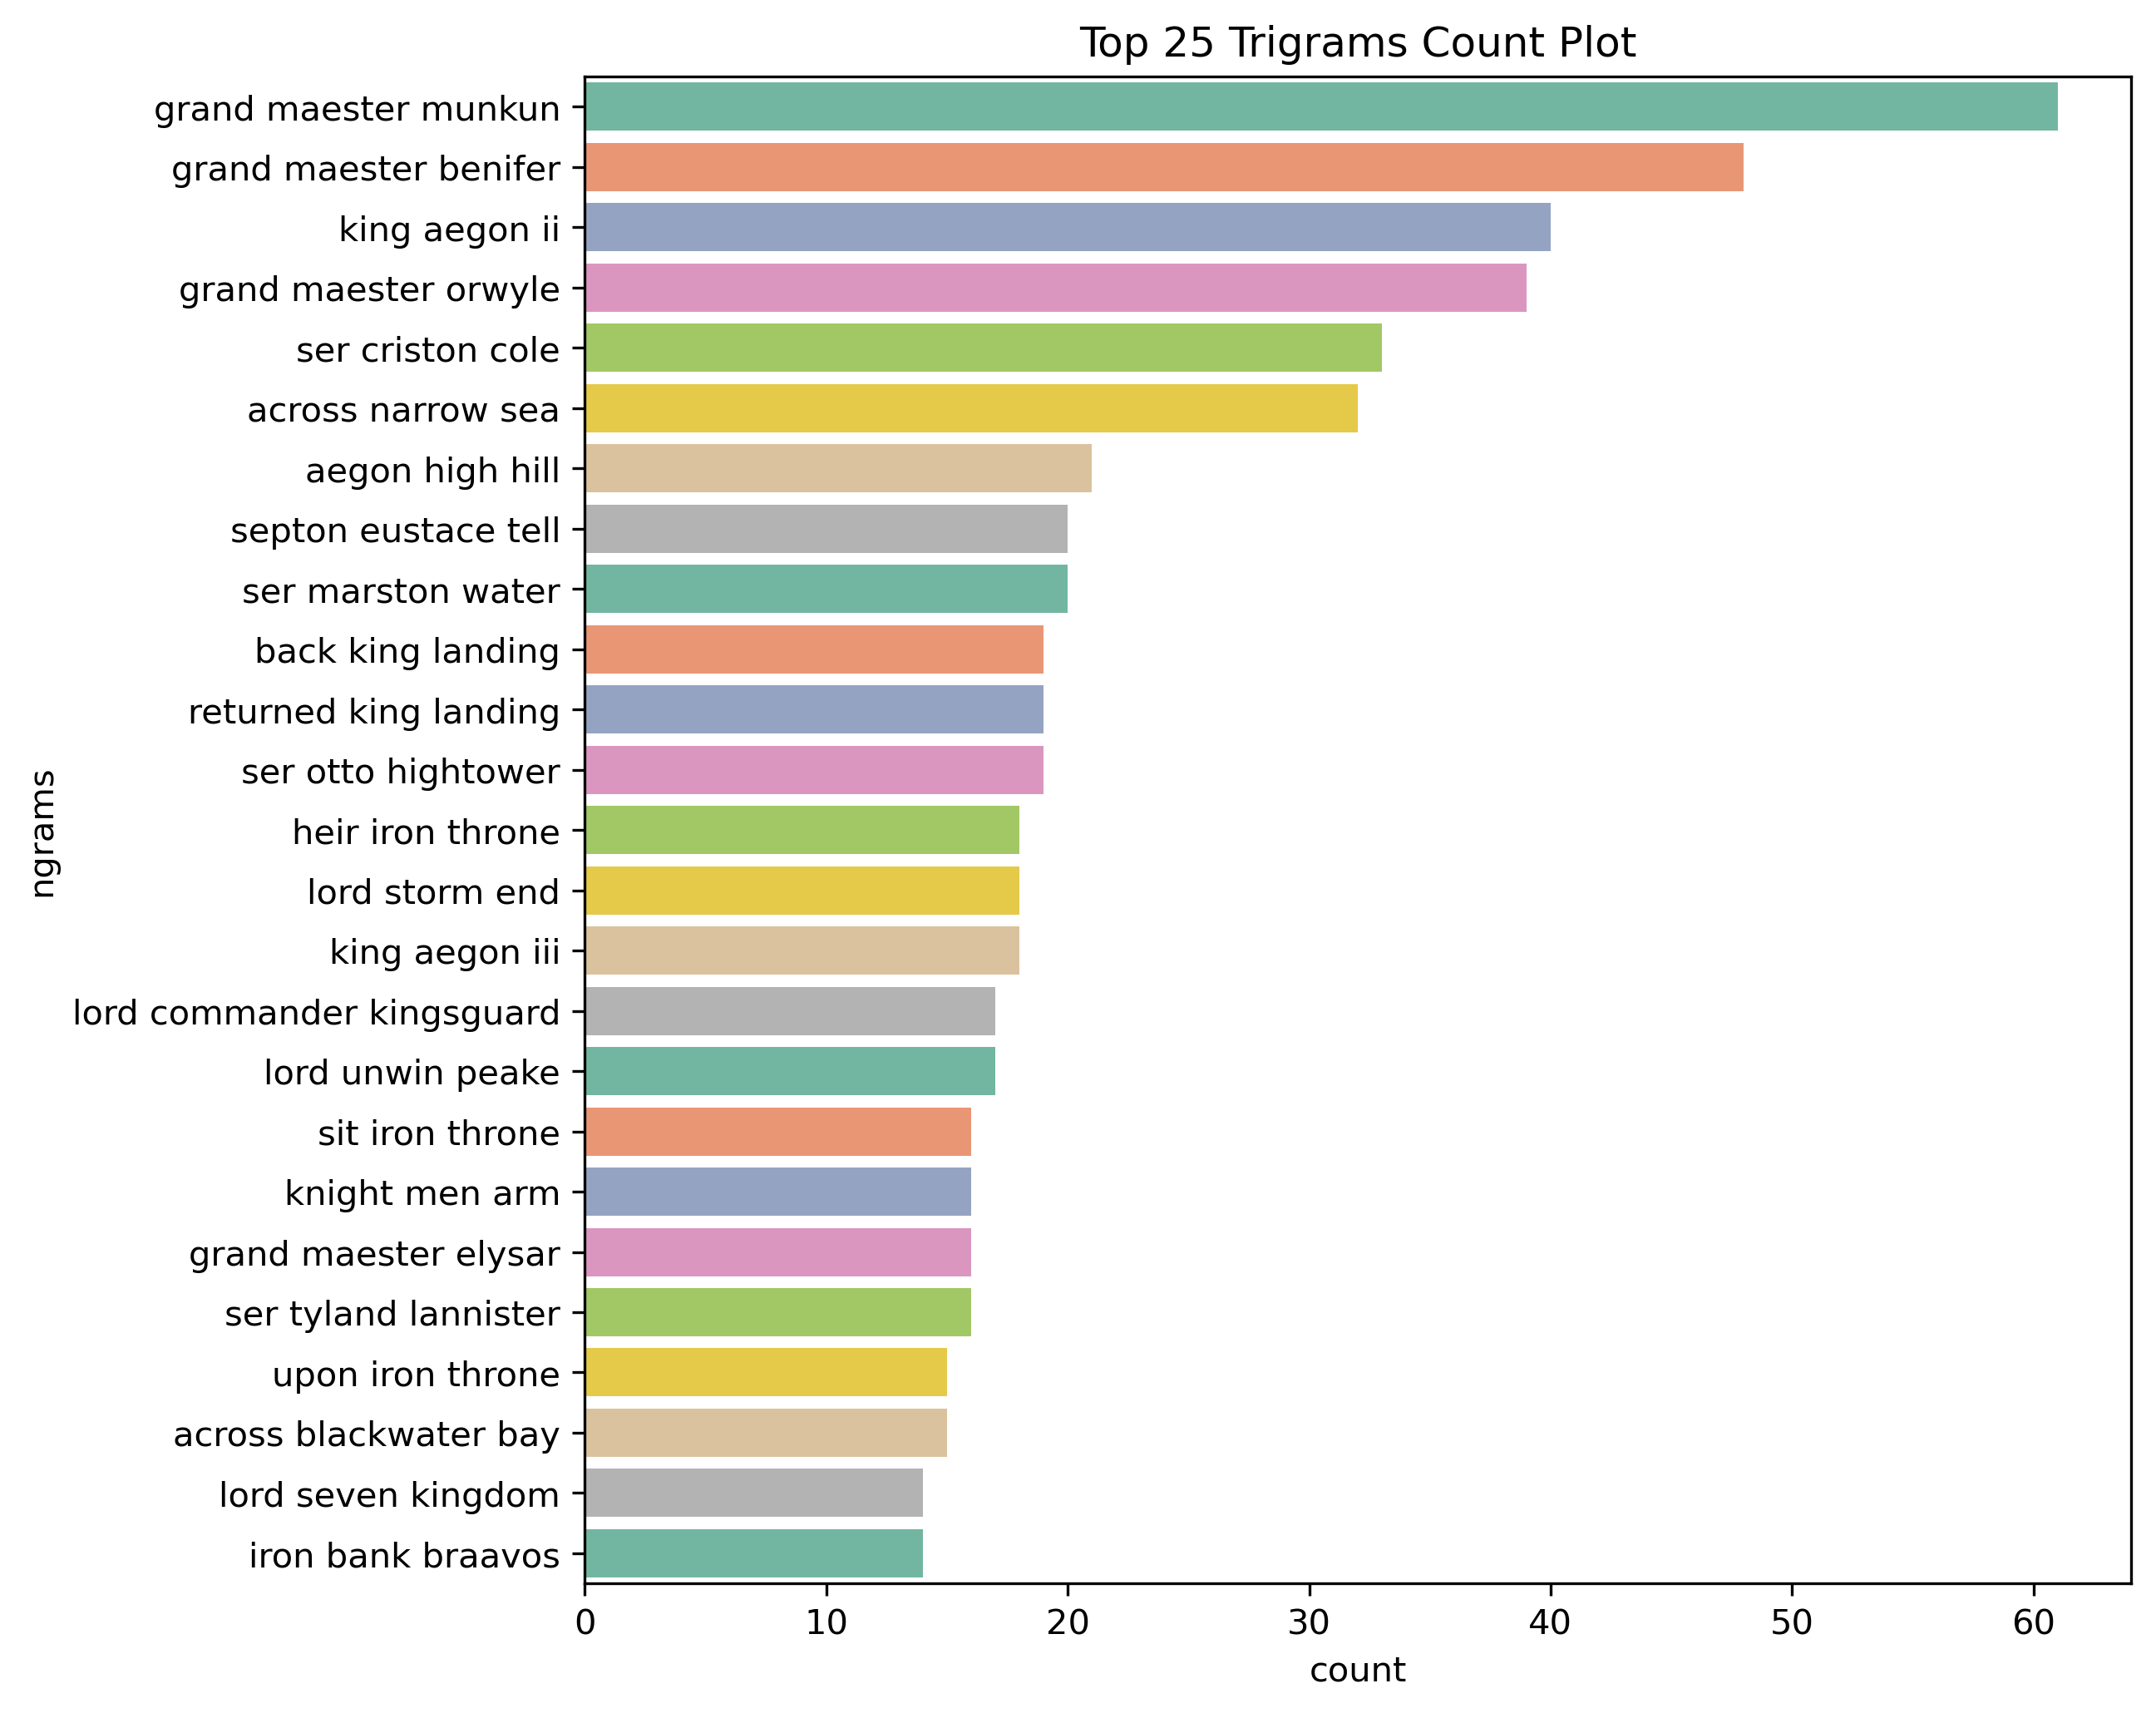

In [ ]:
top_k = 25
top_k_trigrams = paragraph_analysis.get_top_k_ngrams(n=3, top_k=top_k)
paragraph_analysis.plot_top_k_ngrams(
    top_k_trigrams, title=f"Top {top_k} Trigrams Count Plot", figsize=(8, 8), dpi=300, save_flag=False)

#### LDA for Topic Extraction

In [ ]:
vectorizer, lda_model, lda_vectors = paragraph_analysis.build_lda(n_components=20)

In [ ]:
topics = paragraph_analysis.extract_topics(vectorizer, lda_model, words_per_topics=30)

NameError: name 'paragraph_analysis' is not defined

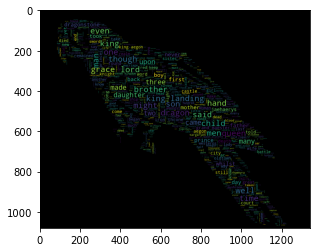

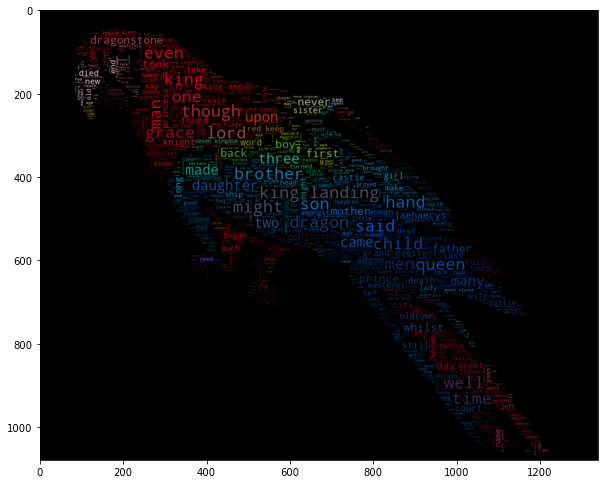

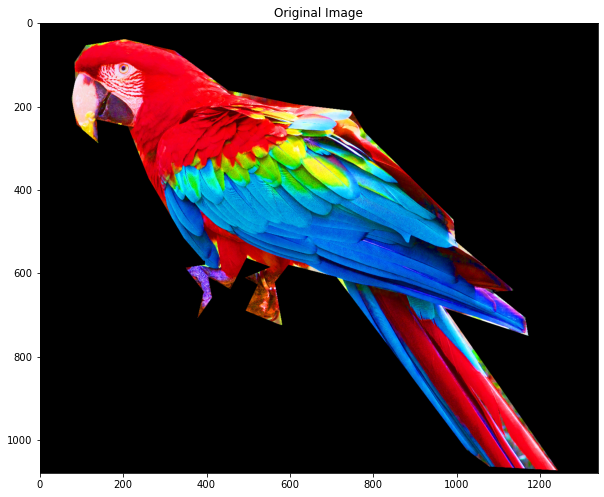

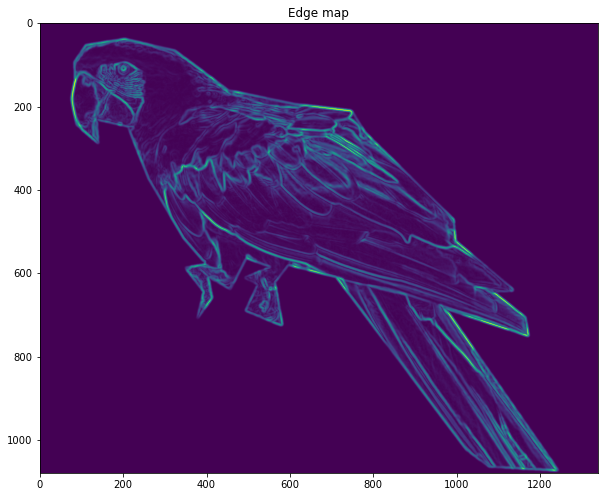

In [ ]:
import os
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_gradient_magnitude

from wordcloud import WordCloud, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = os.path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# load wikipedia text on rainbow
text = ' '.join(paragraph_analysis.raw_corpus)

# load image. This has been modified in gimp to be brighter and have more saturation.
parrot_color = np.array(Image.open(os.path.join(d, "parrot-by-jose-mari-gimenez2.jpg")))
# subsample by factor of 3. Very lossy but for a wordcloud we don't really care.
parrot_color = parrot_color[::3, ::3]

# create mask  white is "masked out"
parrot_mask = parrot_color.copy()
parrot_mask[parrot_mask.sum(axis=2) == 0] = 255

# some finesse: we enforce boundaries between colors so they get less washed out.
# For that we do some edge detection in the image
edges = np.mean([gaussian_gradient_magnitude(parrot_color[:, :, i] / 255., 2) for i in range(3)], axis=0)
parrot_mask[edges > .08] = 255

# create wordcloud. A bit sluggish, you can subsample more strongly for quicker rendering
# relative_scaling=0 means the frequencies in the data are reflected less
# acurately but it makes a better picture
wc = WordCloud(max_words=2000, mask=parrot_mask, max_font_size=40, random_state=42, relative_scaling=0)

# generate word cloud
wc.generate(text)
plt.imshow(wc)

# create coloring from image
image_colors = ImageColorGenerator(parrot_color)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
wc.to_file("parrot_new.png")

plt.figure(figsize=(10, 10))
plt.title("Original Image")
plt.imshow(parrot_color)

plt.figure(figsize=(10, 10))
plt.title("Edge map")
plt.imshow(edges)
plt.show()